In [1]:
#Importing all the neccesary libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_validate

In [10]:
Company= pd.read_excel("Company_Data2015-1.xlsx")
Company.head()

Co_Code          Co_Name  Networth Next Year  Equity Paid Up  Networth  \
0    16974      Hind.Cables            -8021.60          419.36  -7027.48   
1    21214  Tata Tele. Mah.            -3986.19         1954.93  -2968.08   
2    14852     ABG Shipyard            -3192.58           53.84    506.86   
3     2439              GTL            -3054.51          157.30   -623.49   
4    23505  Bharati Defence            -2967.36           50.30  -1070.83   

   Capital Employed  Total Debt  Gross Block   Net Working Capital   \
0          -1007.24     5936.03        474.30              -1076.34   
1           4458.20     7410.18       9070.86              -1098.88   
2           7714.68     6944.54       1281.54               4496.25   
3           2353.88     2326.05       1033.69              -2612.42   
4           4675.33     5740.90       1084.20               1836.23   

   Current Assets   ...  PBIDTM (%)[Latest]  PBITM (%)[Latest]  \
0            40.50  ...                0.00               0.00   
1           486.86  ...              -10.30             -39.74   
2          9097.64  ...            -5279.14           -5516.98   
3          1034.12  ...               -3.33              -7.21   
4          4685.81  ...             -295.55            -400.55   

   PBDTM (%)[Latest]  CPM (%)[Latest]  APATM (%)[Latest]  \
0               0.00             0.00               0.00   
1             -57.74           -57.74             -87.18   
2           -7780.25         -7723.67           -7961.51   
3             -48.13           -47.70             -51.58   
4            -845.88           379.79             274.79   

   Debtors Velocity (Days)  Creditors Velocity (Days)  \
0                        0                          0   
1                       29                        101   
2                       97                        558   
3                       93                         63   
4                     3887                        346   

   Inventory Velocity (Days)  Value of Output/Total Assets  \
0                       45.0                          0.00   
1                        2.0                          0.31   
2                        0.0                         -0.03   
3                        2.0                          0.24   
4                        0.0                          0.01   

   Value of Output/Gross Block  
0                         0.00  
1                         0.24  
2                        -0.26  
3                         1.90  
4                         0.05  

[5 rows x 67 columns]

In [11]:
Company.columns=Company.columns.str.replace(' ', '_').str.replace('/','_by_').str.replace('&','and').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('[','_').str.replace(']','').str.replace('-','_').str.replace('.','')

In [4]:
df.head()

Co_Code          Co_Name  Networth_Next_Year  Equity_Paid_Up  Networth  \
0    16974      Hind.Cables            -8021.60          419.36  -7027.48   
1    21214  Tata Tele. Mah.            -3986.19         1954.93  -2968.08   
2    14852     ABG Shipyard            -3192.58           53.84    506.86   
3     2439              GTL            -3054.51          157.30   -623.49   
4    23505  Bharati Defence            -2967.36           50.30  -1070.83   

   Capital_Employed  Total_Debt  Gross_Block_  Net_Working_Capital_  \
0          -1007.24     5936.03        474.30              -1076.34   
1           4458.20     7410.18       9070.86              -1098.88   
2           7714.68     6944.54       1281.54               4496.25   
3           2353.88     2326.05       1033.69              -2612.42   
4           4675.33     5740.90       1084.20               1836.23   

   Current_Assets_  ...  PBIDTM_perc_Latest  PBITM_perc_Latest  \
0            40.50  ...                0.00               0.00   
1           486.86  ...              -10.30             -39.74   
2          9097.64  ...            -5279.14           -5516.98   
3          1034.12  ...               -3.33              -7.21   
4          4685.81  ...             -295.55            -400.55   

   PBDTM_perc_Latest  CPM_perc_Latest  APATM_perc_Latest  \
0               0.00             0.00               0.00   
1             -57.74           -57.74             -87.18   
2           -7780.25         -7723.67           -7961.51   
3             -48.13           -47.70             -51.58   
4            -845.88           379.79             274.79   

   Debtors_Velocity_Days  Creditors_Velocity_Days  Inventory_Velocity_Days  \
0                      0                        0                     45.0   
1                     29                      101                      2.0   
2                     97                      558                      0.0   
3                     93                       63                      2.0   
4                   3887                      346                      0.0   

   Value_of_Output_by_Total_Assets  Value_of_Output_by_Gross_Block  
0                             0.00                            0.00  
1                             0.31                            0.24  
2                            -0.03                           -0.26  
3                             0.24                            1.90  
4                             0.01                            0.05  

[5 rows x 67 columns]

In [12]:
Company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth_Next_Year                   3586 non-null   float64
 3   Equity_Paid_Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital_Employed                     3586 non-null   float64
 6   Total_Debt                           3586 non-null   float64
 7   Gross_Block_                         3586 non-null   float64
 8   Net_Working_Capital_                 3586 non-null   float64
 9   Current_Assets_                      3586 non-null   float64
 10  Current_Liabilities_and_Provisions_  3586 non-null   float64
 11  Total_Assets_by_Liabilities_  

In [13]:
Company.describe().T

count          mean           std      min  \
Co_Code                          3586.0  16065.388734  19776.817379     4.00   
Networth_Next_Year               3586.0    725.045251   4769.681004 -8021.60   
Equity_Paid_Up                   3586.0     62.966584    778.761744     0.00   
Networth                         3586.0    649.746299   4091.988792 -7027.48   
Capital_Employed                 3586.0   2799.611054  26975.135385 -1824.75   
...                                 ...           ...           ...      ...   
Debtors_Velocity_Days            3586.0    603.894032  10636.759580     0.00   
Creditors_Velocity_Days          3586.0   2057.854992  54169.479197     0.00   
Inventory_Velocity_Days          3483.0     79.644559    137.847792  -199.00   
Value_of_Output_by_Total_Assets  3586.0      0.819757      1.201400    -0.33   
Value_of_Output_by_Gross_Block   3586.0     61.884548    976.824352   -61.00   

                                       25%       50%         75%         max  
Co_Code                          3029.2500  6077.500  24269.5000    72493.00  
Networth_Next_Year                  3.9850    19.015    123.8025   111729.10  
Equity_Paid_Up                      3.7500     8.290     19.5175    42263.46  
Networth                            3.8925    18.580    117.2975    81657.35  
Capital_Employed                    7.6025    39.090    226.6050   714001.25  
...                                    ...       ...         ...         ...  
Debtors_Velocity_Days               8.0000    49.000    106.0000   514721.00  
Creditors_Velocity_Days             8.0000    39.000     89.0000  2034145.00  
Inventory_Velocity_Days             0.0000    35.000     96.0000      996.00  
Value_of_Output_by_Total_Assets     0.0700     0.480      1.1600       17.63  
Value_of_Output_by_Gross_Block      0.2700     1.530      4.9100    43404.00  

[66 rows x 8 columns]

In [14]:
print("There are",Company.isnull().sum().sum(),"missing value in the dataset")

There are 118 missing value in the dataset


In [15]:
print('The number of rows (observations) is',Company.shape[0],'\n''The number of columns (variables) is',Company.shape[1])

The number of rows (observations) is 3586 
The number of columns (variables) is 67


In [16]:
dups = Company.duplicated().sum()
dups

0

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66]),
 [Text(1, 0, 'Co_Code'),
  Text(2, 0, 'Networth_Next_Year'),
  Text(3, 0, 'Equity_Paid_Up'),
  Text(4, 0, 'Networth'),
  Text(5, 0, 'Capital_Employed'),
  Text(6, 0, 'Total_Debt'),
  Text(7, 0, 'Gross_Block_'),
  Text(8, 0, 'Net_Working_Capital_'),
  Text(9, 0, 'Current_Assets_'),
  Text(10, 0, 'Current_Liabilities_and_Provisions_'),
  Text(11, 0, 'Total_Assets_by_Liabilities_'),
  Text(12, 0, 'Gross_Sales'),
  Text(13, 0, 'Net_Sales'),
  Text(14, 0, 'Other_Income'),
  Text(15, 0, 'Value_Of_Output'),
  Text(16, 0, 'Cost_of_Production'),
  Text(17, 0, 'Selling_Cost'),
  Text(18, 0, 'PBIDT'),
  Text(19, 0, 'PBDT'),
  Text(20, 0, 'PBIT'),
  Text(21, 0, 'PBT'),
  Text(22, 0, 'PAT'),
  Text(23, 0, 

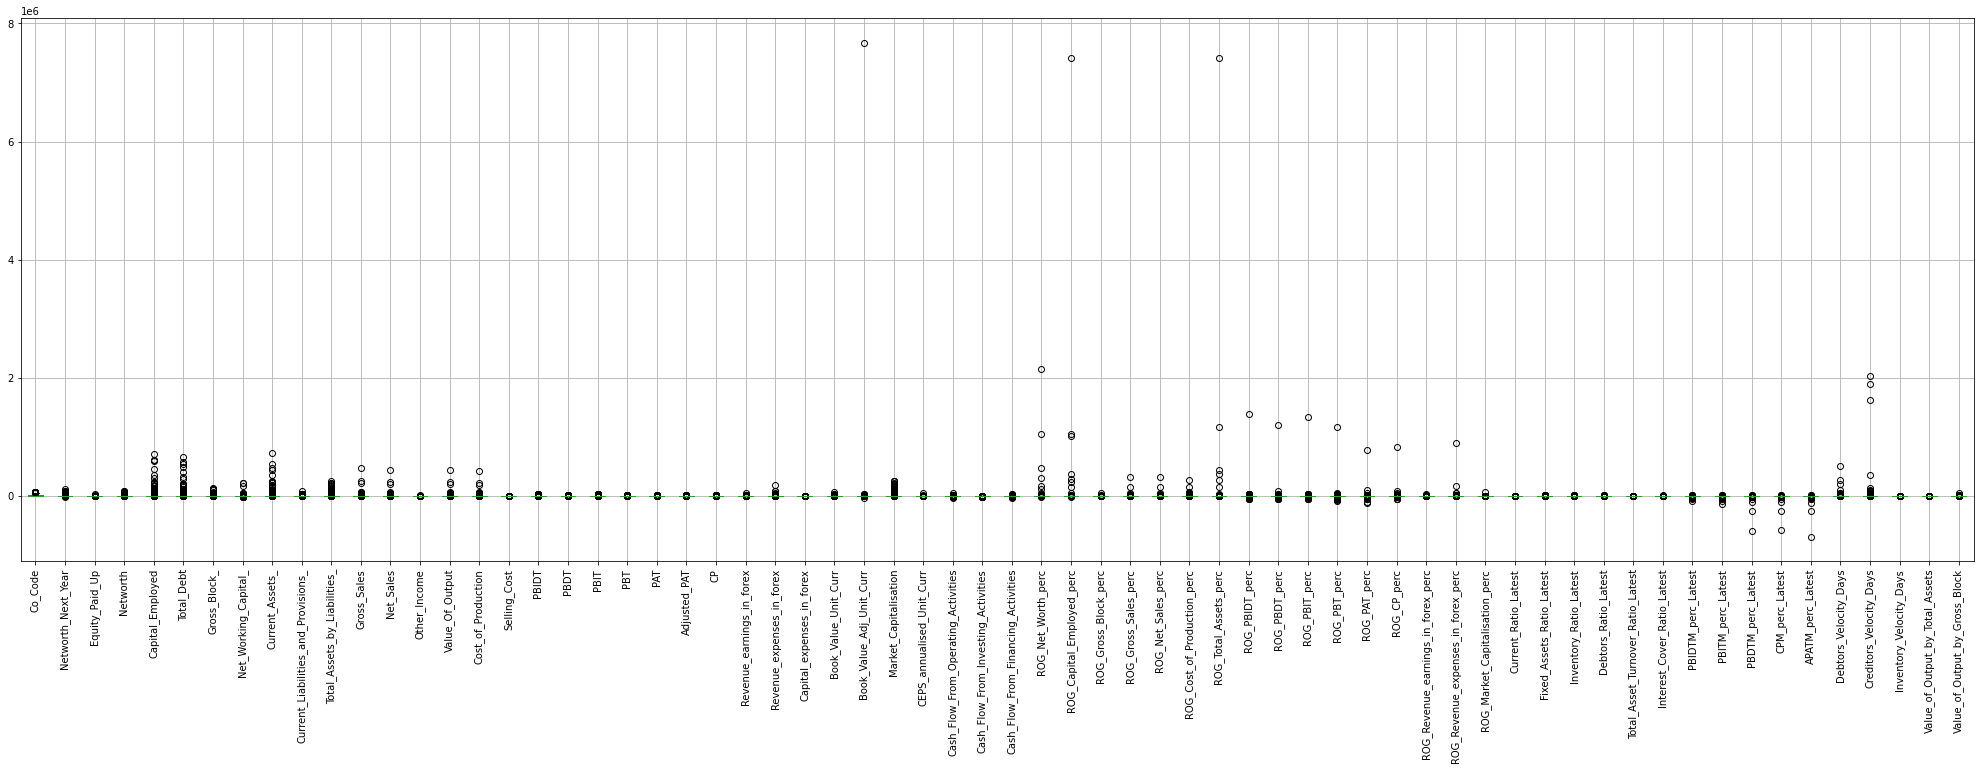

In [18]:
plt.figure(figsize=(35,10))
Company.boxplot()
plt.xticks(rotation=90)

In [19]:
net = Company.sort_values(by="Networth",ascending=False)
net.head()

Co_Code        Co_Name  Networth_Next_Year  Equity_Paid_Up  Networth  \
3584    12001           NTPC            91293.70         8245.46  81657.35   
3585    15542  Bharti Airtel           111729.10         1998.70  78270.80   
3583    12002        I O C L            88134.31         2427.95  67969.97   
3577      566     Tata Steel            46637.38          971.41  66663.89   
3581     4987      HDFC Bank            72677.77          501.30  62009.42   

      Capital_Employed  Total_Debt  Gross_Block_  Net_Working_Capital_  \
3584         173099.14    85995.34     128477.59              11449.79   
3585         104241.00    21569.70     100084.90             -12145.30   
3583         140686.75    55245.01     121643.45               6376.84   
3577         101142.12    28198.44      42583.38              -3727.04   
3581         590576.00   496009.19       8463.30                  0.00   

      Current_Assets_  ...  PBIDTM_perc_Latest  PBITM_perc_Latest  \
3584         42353.59  ...               28.12              20.55   
3585         11947.10  ...               42.47              22.88   
3583         89609.82  ...                8.09               6.69   
3577         12669.15  ...               22.77              16.12   
3581        444633.50  ...                0.00               0.00   

      PBDTM_perc_Latest  CPM_perc_Latest  APATM_perc_Latest  \
3584              23.39            19.55              11.99   
3585              34.04            25.97               6.37   
3583               7.31             5.69               4.29   
3577              17.72            13.77               7.12   
3581               0.00             0.00               0.00   

      Debtors_Velocity_Days  Creditors_Velocity_Days  Inventory_Velocity_Days  \
3584                     32                       69                     42.0   
3585                     18                       74                      0.0   
3583                      7                       30                     48.0   
3577                      5                      102                    102.0   
3581                      0                        0                      NaN   

      Value_of_Output_by_Total_Assets  Value_of_Output_by_Gross_Block  
3584                             0.36                            0.68  
3585                             0.42                            0.49  
3583                             1.42                            3.24  
3577                             0.43                            0.81  
3581                             0.60                            7.76  

[5 rows x 67 columns]

# BI VARIATE ANALYSIS

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'NTPC'),
  Text(1, 0, 'Bharti Airtel'),
  Text(2, 0, 'I O C L'),
  Text(3, 0, 'Tata Steel'),
  Text(4, 0, 'HDFC Bank'),
  Text(5, 0, 'Infosys'),
  Text(6, 0, 'Axis Bank'),
  Text(7, 0, 'Sardar Sar.Narm.'),
  Text(8, 0, 'S A I L'),
  Text(9, 0, 'General Insuranc')])

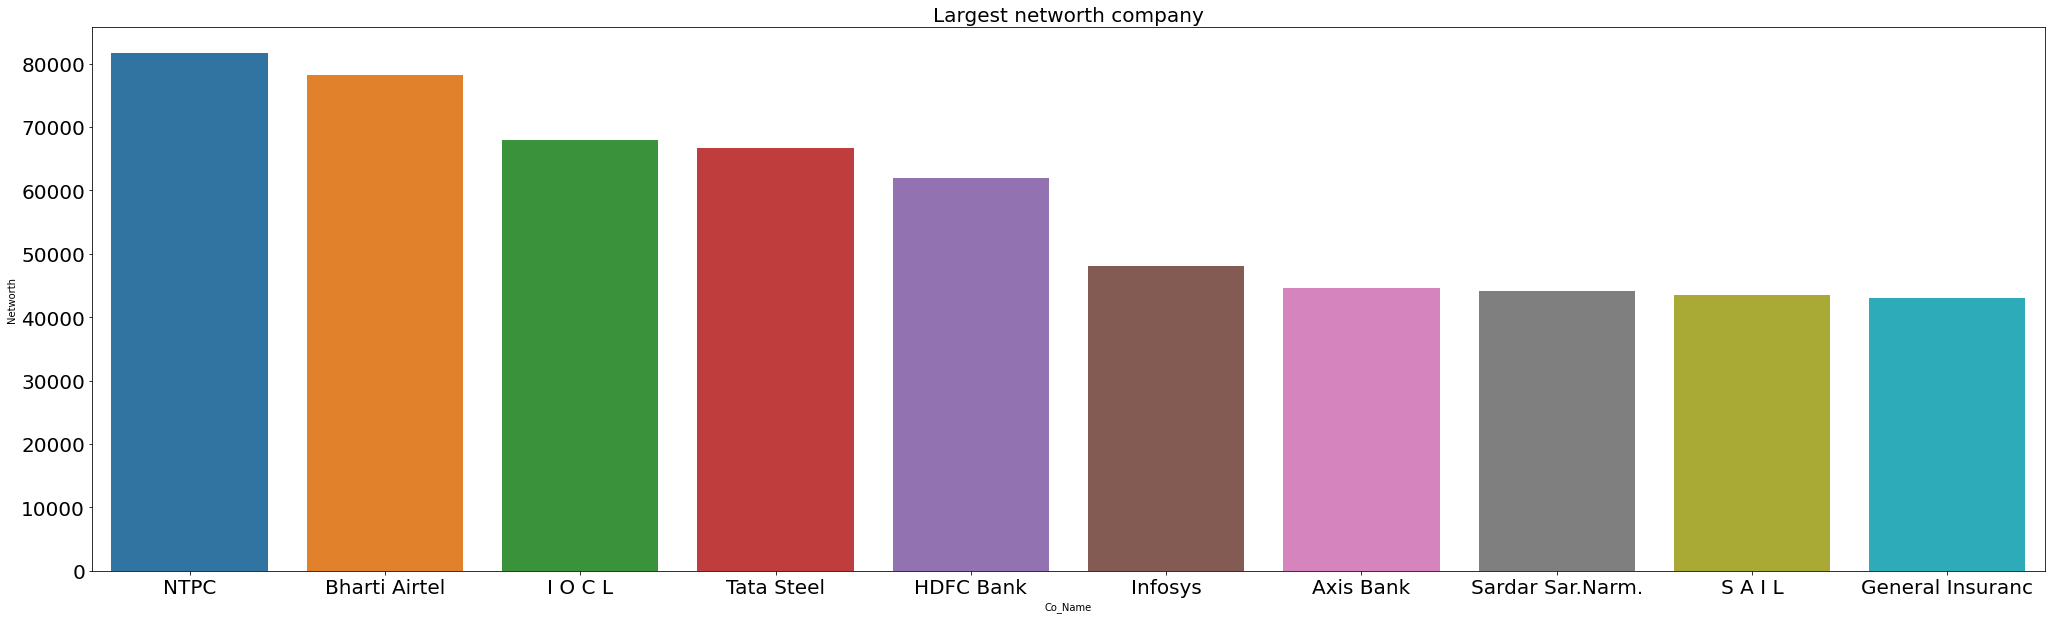

In [20]:
plt.figure(figsize=(35,10))
ax = sns.barplot(x='Co_Name', y='Networth',data=net.head(10))
plt.title("Largest networth company",fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

In [21]:
debt = Company.sort_values(by="Total_Debt",ascending=False)
debt.head()

Co_Code           Co_Name  Networth_Next_Year  Equity_Paid_Up  Networth  \
3572     5456    Bank of Baroda            40198.98          443.56  38848.05   
3561     5654     Bank of India            26310.46          665.65  27891.59   
3568     7855  Punjab Natl.Bank            35465.36          370.91  37691.97   
3581     4987         HDFC Bank            72677.77          501.30  62009.42   
3579     5554         Axis Bank            53164.91          474.10  44676.51   

      Capital_Employed  Total_Debt  Gross_Block_  Net_Working_Capital_  \
3572         714001.25   652823.81       5554.19                   0.0   
3561         615142.63   571963.75       5210.13                   0.0   
3568         602355.88   547049.19       5290.13                   0.0   
3581         590576.00   496009.19       8463.30                   0.0   
3579         461977.78   402200.22       4497.01                   0.0   

      Current_Assets_  ...  PBIDTM_perc_Latest  PBITM_perc_Latest  \
3572        721166.00  ...                 0.0                0.0   
3561        542253.81  ...                 0.0                0.0   
3568        482024.22  ...                 0.0                0.0   
3581        444633.50  ...                 0.0                0.0   
3579        358193.47  ...                 0.0                0.0   

      PBDTM_perc_Latest  CPM_perc_Latest  APATM_perc_Latest  \
3572                0.0              0.0                0.0   
3561                0.0              0.0                0.0   
3568                0.0              0.0                0.0   
3581                0.0              0.0                0.0   
3579                0.0              0.0                0.0   

      Debtors_Velocity_Days  Creditors_Velocity_Days  Inventory_Velocity_Days  \
3572                      0                        0                      0.0   
3561                      0                        0                      0.0   
3568                      0                        0                      0.0   
3581                      0                        0                      NaN   
3579                      0                        0                      NaN   

      Value_of_Output_by_Total_Assets  Value_of_Output_by_Gross_Block  
3572                             0.67                            5.29  
3561                             0.81                            8.48  
3568                             0.81                            8.53  
3581                             0.60                            7.76  
3579                             0.66                            8.43  

[5 rows x 67 columns]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Bank of Baroda'),
  Text(1, 0, 'Bank of India'),
  Text(2, 0, 'Punjab Natl.Bank'),
  Text(3, 0, 'HDFC Bank'),
  Text(4, 0, 'Axis Bank'),
  Text(5, 0, 'IDBI Bank'),
  Text(6, 0, 'Syndicate Bank'),
  Text(7, 0, 'Oriental Bank'),
  Text(8, 0, 'Corporation Bank'),
  Text(9, 0, 'H D F C')])

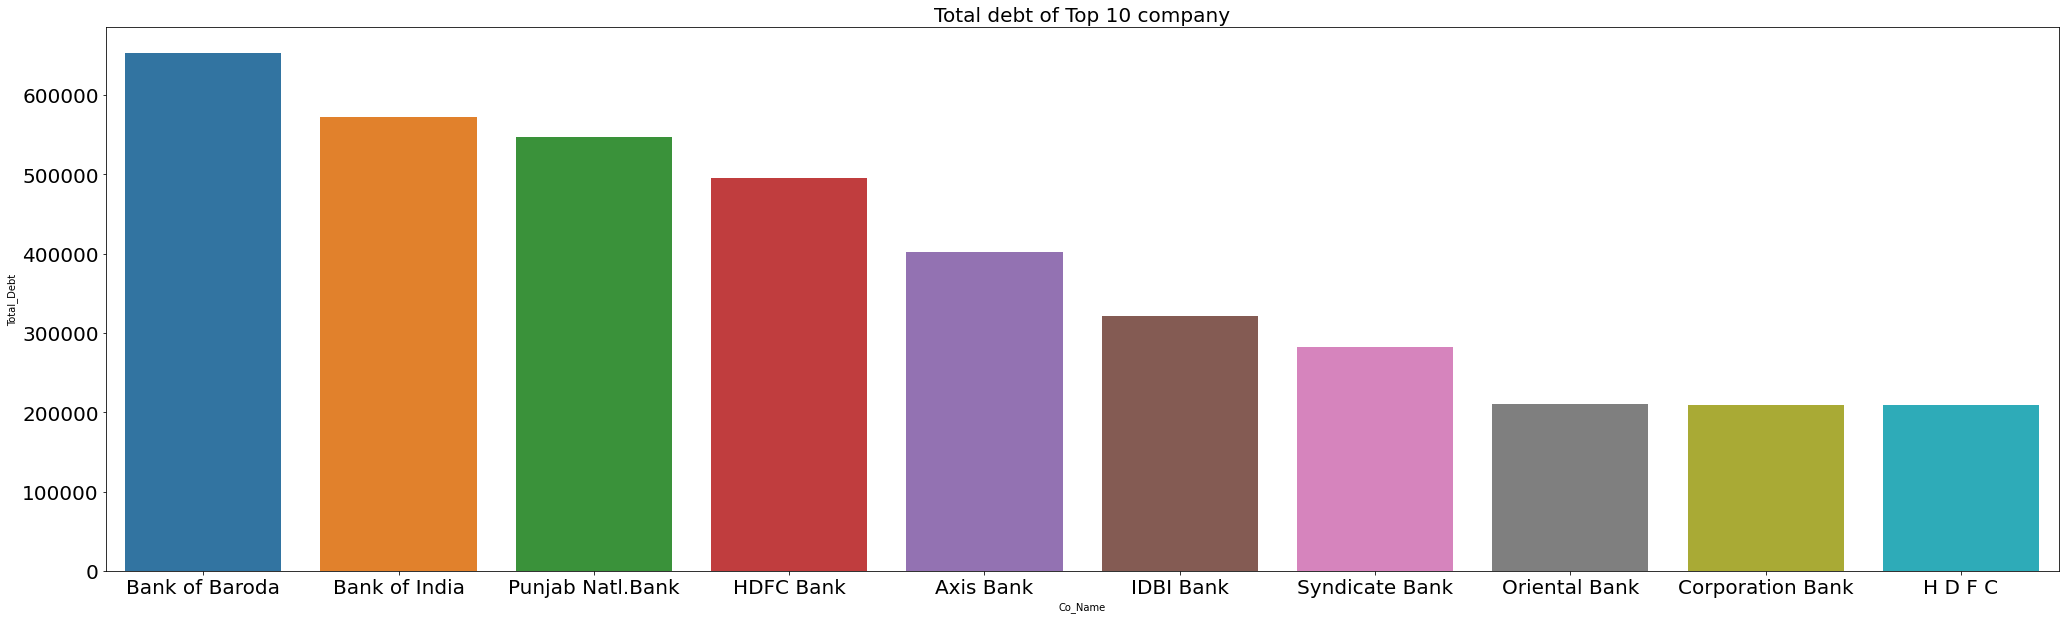

In [22]:
plt.figure(figsize=(35,10))
ax = sns.barplot(x='Co_Name', y='Total_Debt',data=debt.head(10))
plt.title("Total debt of Top 10 company",fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

In [24]:
C_assests = Company.sort_values(by="Current_Assets_",ascending=False)
C_assests.head()

Co_Code           Co_Name  Networth_Next_Year  Equity_Paid_Up  Networth  \
3572     5456    Bank of Baroda            40198.98          443.56  38848.05   
3561     5654     Bank of India            26310.46          665.65  27891.59   
3568     7855  Punjab Natl.Bank            35465.36          370.91  37691.97   
3581     4987         HDFC Bank            72677.77          501.30  62009.42   
3579     5554         Axis Bank            53164.91          474.10  44676.51   

      Capital_Employed  Total_Debt  Gross_Block_  Net_Working_Capital_  \
3572         714001.25   652823.81       5554.19                   0.0   
3561         615142.63   571963.75       5210.13                   0.0   
3568         602355.88   547049.19       5290.13                   0.0   
3581         590576.00   496009.19       8463.30                   0.0   
3579         461977.78   402200.22       4497.01                   0.0   

      Current_Assets_  ...  PBIDTM_perc_Latest  PBITM_perc_Latest  \
3572        721166.00  ...                 0.0                0.0   
3561        542253.81  ...                 0.0                0.0   
3568        482024.22  ...                 0.0                0.0   
3581        444633.50  ...                 0.0                0.0   
3579        358193.47  ...                 0.0                0.0   

      PBDTM_perc_Latest  CPM_perc_Latest  APATM_perc_Latest  \
3572                0.0              0.0                0.0   
3561                0.0              0.0                0.0   
3568                0.0              0.0                0.0   
3581                0.0              0.0                0.0   
3579                0.0              0.0                0.0   

      Debtors_Velocity_Days  Creditors_Velocity_Days  Inventory_Velocity_Days  \
3572                      0                        0                      0.0   
3561                      0                        0                      0.0   
3568                      0                        0                      0.0   
3581                      0                        0                      NaN   
3579                      0                        0                      NaN   

      Value_of_Output_by_Total_Assets  Value_of_Output_by_Gross_Block  
3572                             0.67                            5.29  
3561                             0.81                            8.48  
3568                             0.81                            8.53  
3581                             0.60                            7.76  
3579                             0.66                            8.43  

[5 rows x 67 columns]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Bank of Baroda'),
  Text(1, 0, 'Bank of India'),
  Text(2, 0, 'Punjab Natl.Bank'),
  Text(3, 0, 'HDFC Bank'),
  Text(4, 0, 'Axis Bank'),
  Text(5, 0, 'IDBI Bank'),
  Text(6, 0, 'Syndicate Bank'),
  Text(7, 0, 'H D F C'),
  Text(8, 0, 'Power Fin.Corpn.'),
  Text(9, 0, 'Rural Elec.Corp.')])

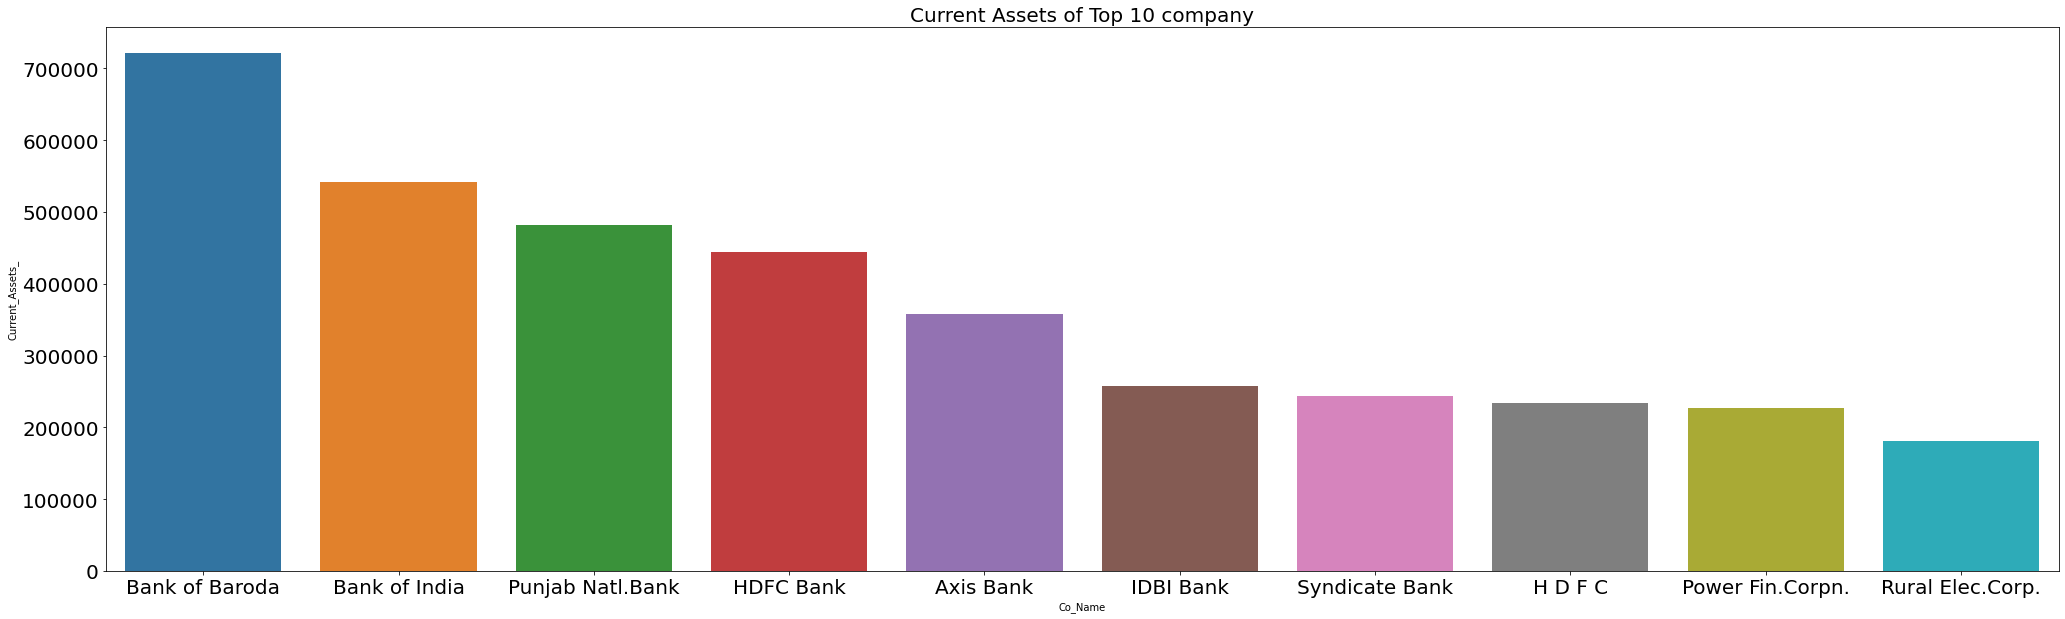

In [26]:
plt.figure(figsize=(35,10))
ax = sns.barplot(x='Co_Name', y='Current_Assets_',data=C_assests.head(10))
plt.title("Current Assets of Top 10 company",fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

In [27]:
Company.corr()

Co_Code  Networth_Next_Year  Equity_Paid_Up  \
Co_Code                          1.000000           -0.052519       -0.005923   
Networth_Next_Year              -0.052519            1.000000        0.364376   
Equity_Paid_Up                  -0.005923            0.364376        1.000000   
Networth                        -0.056693            0.971500        0.389490   
Capital_Employed                -0.042042            0.594155        0.135475   
...                                   ...                 ...             ...   
Debtors_Velocity_Days           -0.002988           -0.006725        0.000297   
Creditors_Velocity_Days         -0.018956           -0.005408       -0.002068   
Inventory_Velocity_Days         -0.054871           -0.025964       -0.017682   
Value_of_Output_by_Total_Assets  0.121782           -0.021756       -0.026866   
Value_of_Output_by_Gross_Block   0.037216           -0.006601       -0.002236   

                                 Networth  Capital_Employed  Total_Debt  \
Co_Code                         -0.056693         -0.042042   -0.036870   
Networth_Next_Year               0.971500          0.594155    0.480513   
Equity_Paid_Up                   0.389490          0.135475    0.078237   
Networth                         1.000000          0.632716    0.517850   
Capital_Employed                 0.632716          1.000000    0.987106   
...                                   ...               ...         ...   
Debtors_Velocity_Days           -0.006442         -0.005134   -0.004396   
Creditors_Velocity_Days         -0.005557         -0.003800   -0.003133   
Inventory_Velocity_Days         -0.020501         -0.035648   -0.034679   
Value_of_Output_by_Total_Assets -0.026738         -0.014550   -0.010805   
Value_of_Output_by_Gross_Block  -0.006944         -0.004363   -0.003593   

                                 Gross_Block_  Net_Working_Capital_  \
Co_Code                             -0.043245             -0.019953   
Networth_Next_Year                   0.742405              0.240580   
Equity_Paid_Up                       0.272824              0.047751   
Networth                             0.737402              0.258749   
Capital_Employed                     0.262347              0.244916   
...                                       ...                   ...   
Debtors_Velocity_Days               -0.005585             -0.002174   
Creditors_Velocity_Days             -0.004431             -0.002274   
Inventory_Velocity_Days              0.001632             -0.011007   
Value_of_Output_by_Total_Assets     -0.009510             -0.026255   
Value_of_Output_by_Gross_Block      -0.007491              0.000919   

                                 Current_Assets_  \
Co_Code                                -0.038191   
Networth_Next_Year                      0.481718   
Equity_Paid_Up                          0.064078   
Networth                                0.520116   
Capital_Employed                        0.975909   
...                                          ...   
Debtors_Velocity_Days                  -0.004031   
Creditors_Velocity_Days                -0.002898   
Inventory_Velocity_Days                -0.030709   
Value_of_Output_by_Total_Assets        -0.009021   
Value_of_Output_by_Gross_Block         -0.003305   

                                 Current_Liabilities_and_Provisions_  ...  \
Co_Code                                                    -0.056355  ...   
Networth_Next_Year                                          0.777579  ...   
Equity_Paid_Up                                              0.173244  ...   
Networth                                                    0.803644  ...   
Capital_Employed                                            0.624448  ...   
...                                                              ...  ...   
Debtors_Velocity_Days                                      -0.004330  ...   
Creditors_Velocity_Days                                    -0.0026

In [28]:
Company = Company.drop(['Co_Code', 'Co_Name'], axis = 1)
Company.head()

Networth_Next_Year  Equity_Paid_Up  Networth  Capital_Employed  Total_Debt  \
0            -8021.60          419.36  -7027.48          -1007.24     5936.03   
1            -3986.19         1954.93  -2968.08           4458.20     7410.18   
2            -3192.58           53.84    506.86           7714.68     6944.54   
3            -3054.51          157.30   -623.49           2353.88     2326.05   
4            -2967.36           50.30  -1070.83           4675.33     5740.90   

   Gross_Block_  Net_Working_Capital_  Current_Assets_  \
0        474.30              -1076.34            40.50   
1       9070.86              -1098.88           486.86   
2       1281.54               4496.25          9097.64   
3       1033.69              -2612.42          1034.12   
4       1084.20               1836.23          4685.81   

   Current_Liabilities_and_Provisions_  Total_Assets_by_Liabilities_  ...  \
0                              1116.85                        109.60  ...   
1                              1585.74                       6043.94  ...   
2                              4601.39                      12316.07  ...   
3                              3646.54                       6000.42  ...   
4                              2849.58                       7524.91  ...   

   PBIDTM_perc_Latest  PBITM_perc_Latest  PBDTM_perc_Latest  CPM_perc_Latest  \
0                0.00               0.00               0.00             0.00   
1              -10.30             -39.74             -57.74           -57.74   
2            -5279.14           -5516.98           -7780.25         -7723.67   
3               -3.33              -7.21             -48.13           -47.70   
4             -295.55            -400.55            -845.88           379.79   

   APATM_perc_Latest  Debtors_Velocity_Days  Creditors_Velocity_Days  \
0               0.00                      0                        0   
1             -87.18                     29                      101   
2           -7961.51                     97                      558   
3             -51.58                     93                       63   
4             274.79                   3887                      346   

   Inventory_Velocity_Days  Value_of_Output_by_Total_Assets  \
0                     45.0                             0.00   
1                      2.0                             0.31   
2                      0.0                            -0.03   
3                      2.0                             0.24   
4                      0.0                             0.01   

   Value_of_Output_by_Gross_Block  
0                            0.00  
1                            0.24  
2                           -0.26  
3                            1.90  
4                            0.05  

[5 rows x 65 columns]

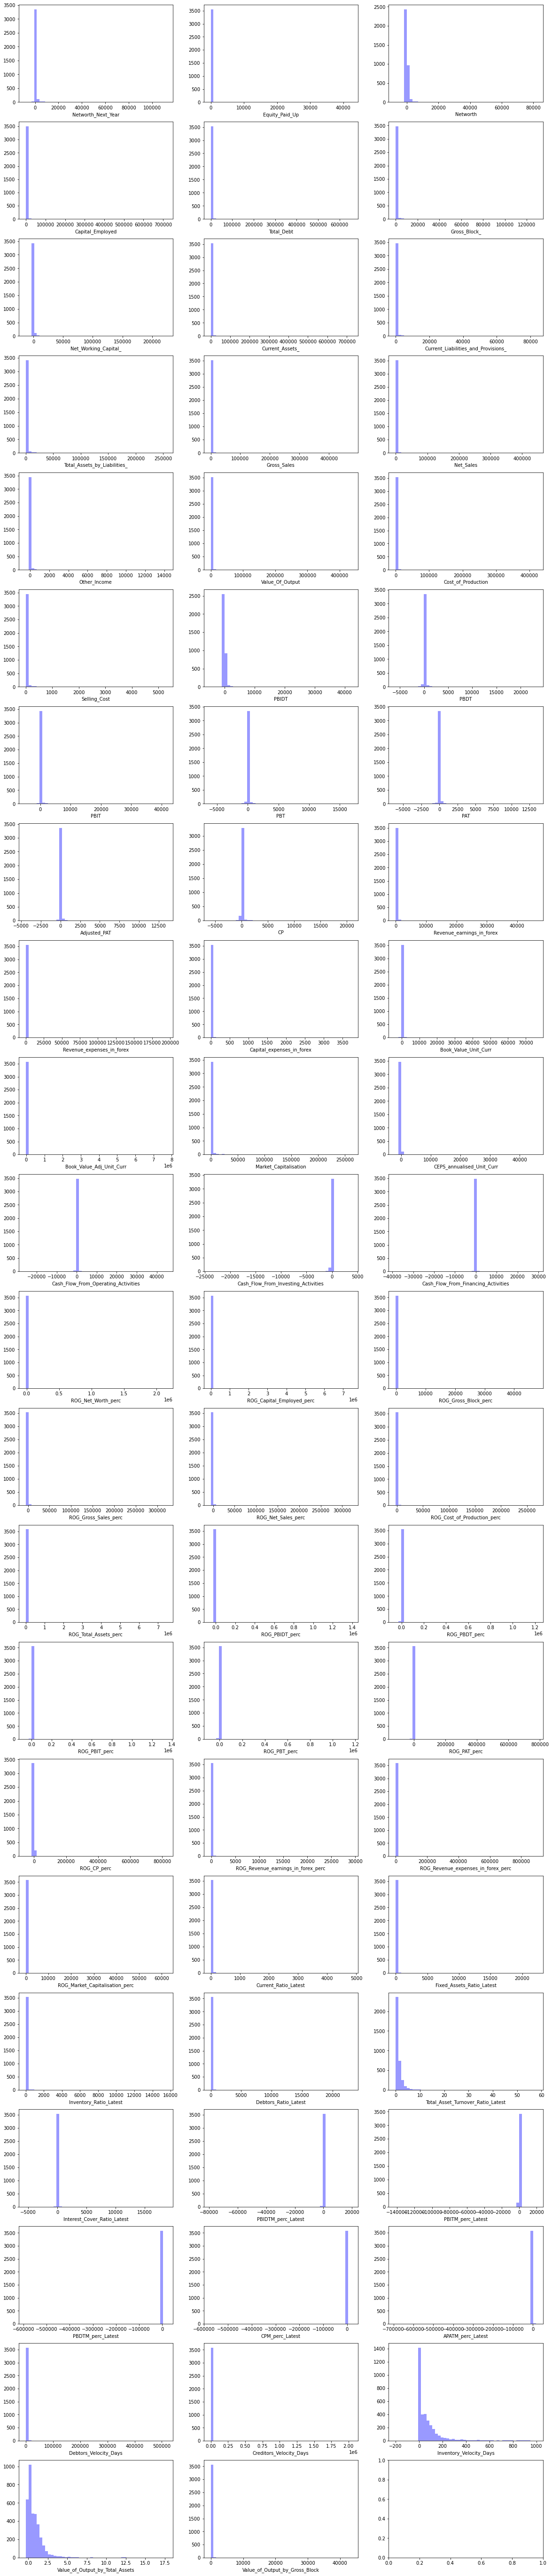

In [29]:
fig, ax = plt.subplots(figsize = (20, 100), nrows = 22, ncols = 3)

for i, col in enumerate(Company.columns):
        sns.distplot(Company[col], ax = ax[i//3, i%3], kde = False, color = 'blue')

In [30]:
pd.DataFrame(Company.skew().sort_values(ascending=False),columns=['Skewness'])

Skewness
Book_Value_Adj_Unit_Curr  59.843813
ROG_PBIT_perc             58.925536
ROG_PBIDT_perc            58.880737
ROG_PBDT_perc             58.407667
ROG_PBT_perc              57.330567
...                             ...
PBIDTM_perc_Latest       -30.931573
PBITM_perc_Latest        -35.997867
CPM_perc_Latest          -47.011631
PBDTM_perc_Latest        -47.750324
APATM_perc_Latest        -49.277483

[65 rows x 1 columns]

None of the variables show perfect normal distribution.Most of the variables have left postive skewness only six variable right negative skewness

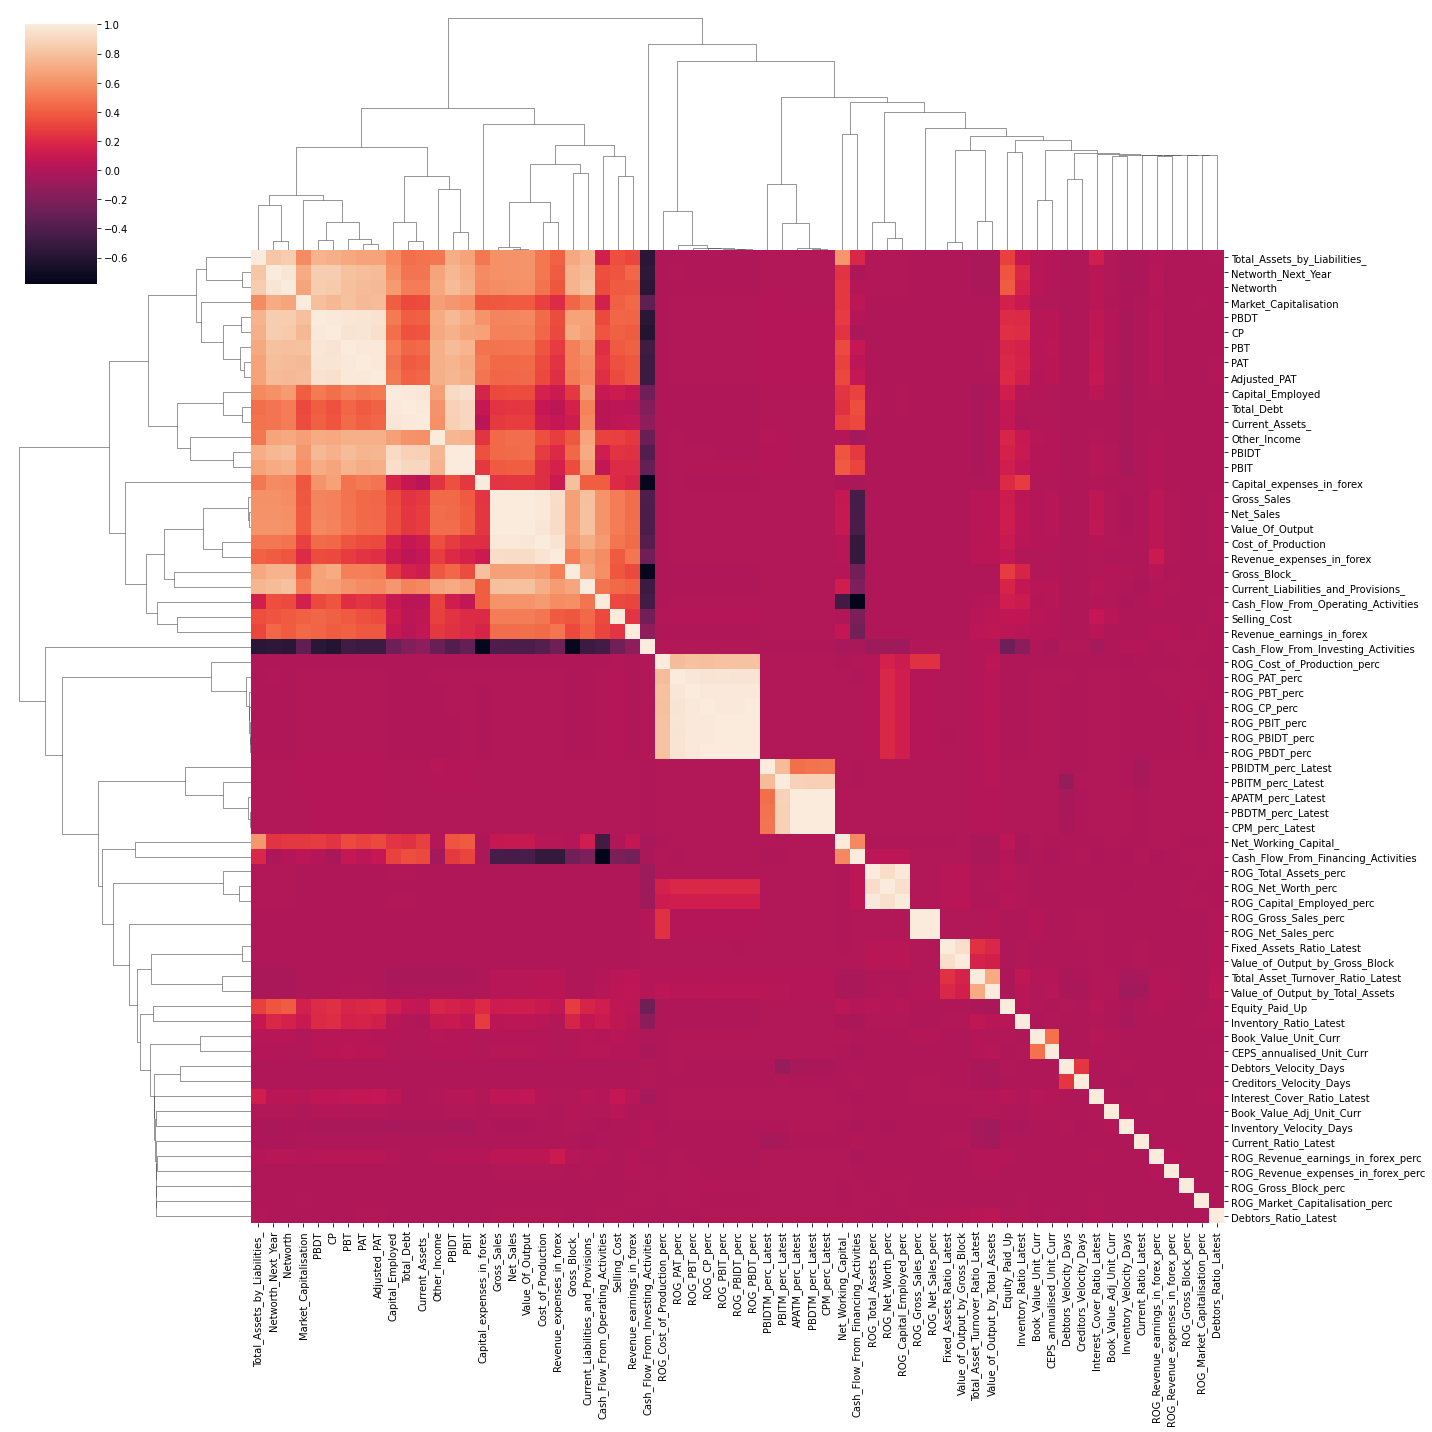

In [31]:

sns.clustermap(Company.corr(),figsize=(20,20))

<AxesSubplot:>

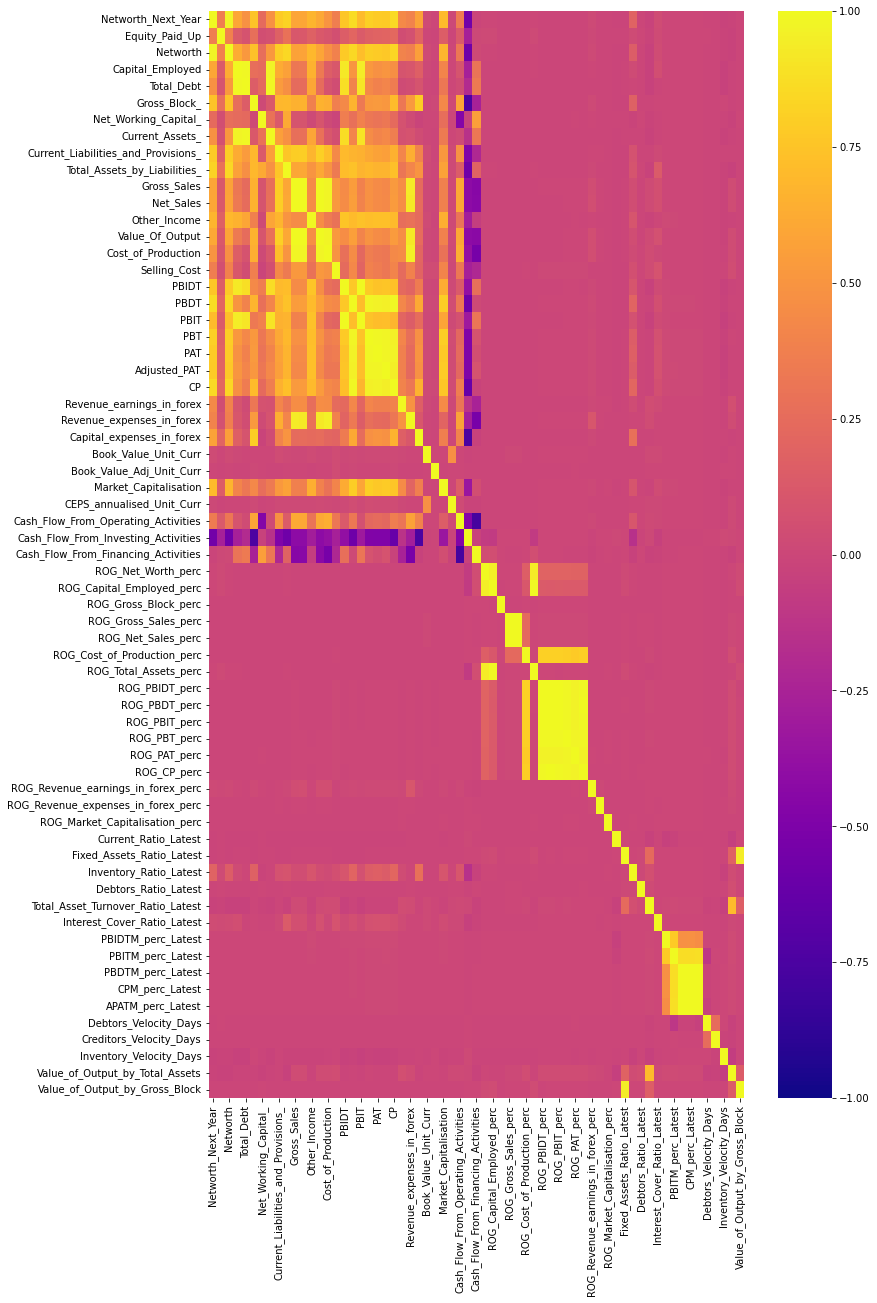

In [32]:
plt.figure(figsize = (12,20))
cor_matrix = Company.corr()
sns.heatmap(cor_matrix, cmap = 'plasma', vmin = -1, vmax= 1)

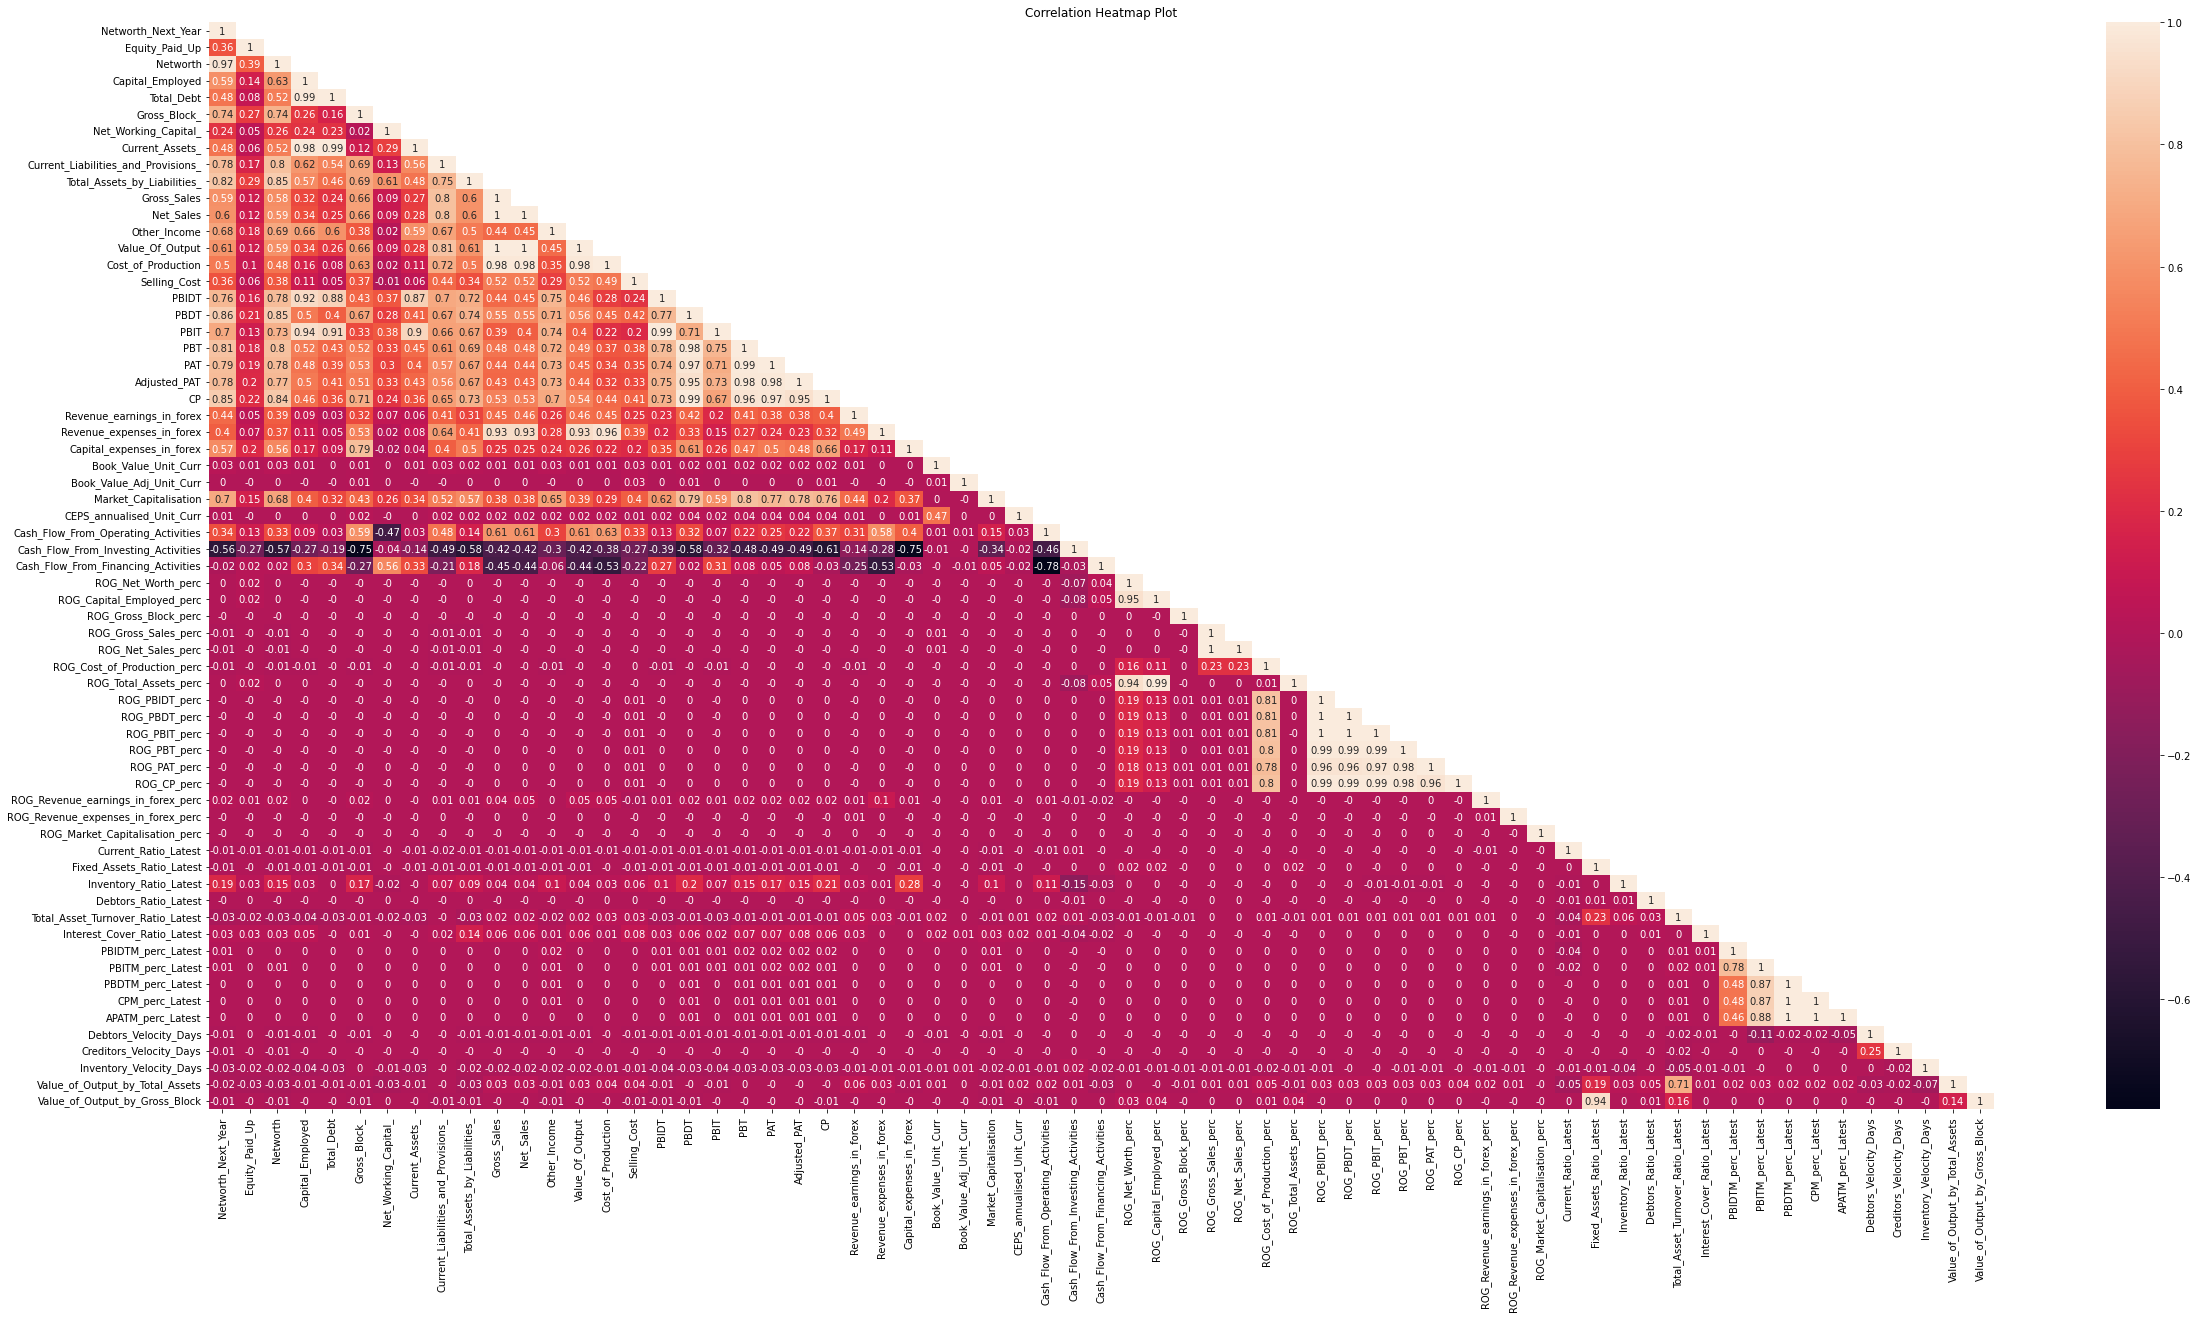

In [33]:
plt.figure(figsize=(40,20))
sns.heatmap(round(Company.corr(),2), annot=True,mask=np.triu(Company.corr(),+1));
plt.title('Correlation Heatmap Plot')
plt.show()

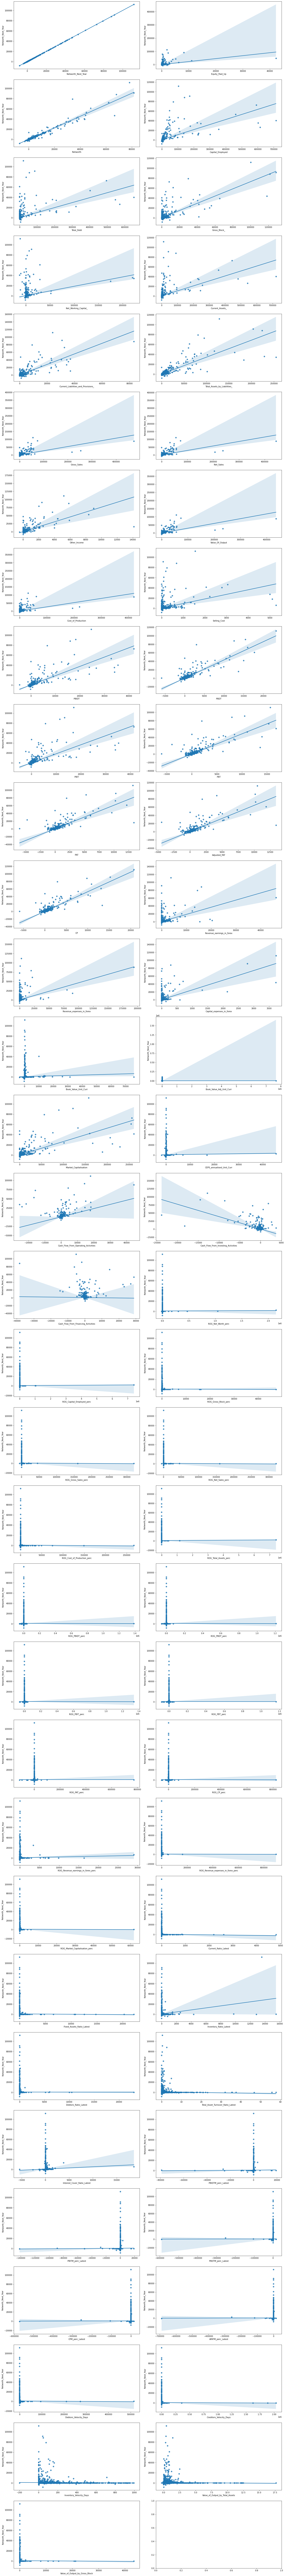

In [34]:
fig, ax = plt.subplots(figsize = (20, 180), nrows = 33, ncols = 2)

for i, col in enumerate(Company.columns):
    sns.regplot(x = Company[col], y = Company['Networth_Next_Year'], ax = ax[i//2, i%2])
    
plt.tight_layout(pad = 1.1)

In [35]:
Company['default'] = np.where((Company['Networth_Next_Year'] > 0), 0, 1)
Company[['default','Networth_Next_Year']].head(10)

default  Networth_Next_Year
0        1            -8021.60
1        1            -3986.19
2        1            -3192.58
3        1            -3054.51
4        1            -2967.36
5        1            -2519.40
6        1            -2125.05
7        1            -2100.56
8        1            -1695.75
9        1            -1677.18

In [36]:
Company['default'].value_counts()

0    3198
1     388
Name: default, dtype: int64

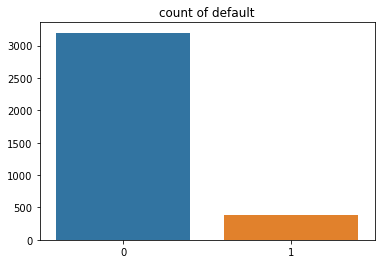

0    0.891801
1    0.108199
Name: default, dtype: float64


In [37]:
sns.barplot(Company.default.value_counts().index,Company.default.value_counts().values)
plt.title("count of default")
plt.show()
print(Company.default.value_counts(normalize=True))

In [38]:
Company.groupby(Company['default']).sum()

Networth_Next_Year  Equity_Paid_Up    Networth  Capital_Employed  \
default                                                                     
0                2667204.13       214372.52  2373938.94        9967572.63   
1                 -67191.86        11425.65   -43948.71          71832.61   

         Total_Debt  Gross_Block_  Net_Working_Capital_  Current_Assets_  \
default                                                                    
0        7046658.81    2059120.06            1462211.15       6968271.01   
1         106779.26      71605.22              10952.31         61541.12   

         Current_Liabilities_and_Provisions_  Total_Assets_by_Liabilities_  \
default                                                                      
0                                 1355094.96                    6255113.91   
1                                   50588.63                     122421.24   

         ...  PBIDTM_perc_Latest  PBITM_perc_Latest  PBDTM_perc_Latest  \
default  ...                                                             
0        ...          -124452.24         -193784.40         -452373.46   
1        ...           -58966.72         -197745.69         -664606.27   

         CPM_perc_Latest  APATM_perc_Latest  Debtors_Velocity_Days  \
default                                                              
0             -463494.89         -532827.17                1983309   
1             -637120.30         -775899.26                 182255   

         Creditors_Velocity_Days  Inventory_Velocity_Days  \
default                                                     
0                        5105452                 243673.0   
1                        2274016                  33729.0   

         Value_of_Output_by_Total_Assets  Value_of_Output_by_Gross_Block  
default                                                                   
0                                2757.62                       220144.65  
1                                 182.03                         1773.34  

[2 rows x 65 columns]

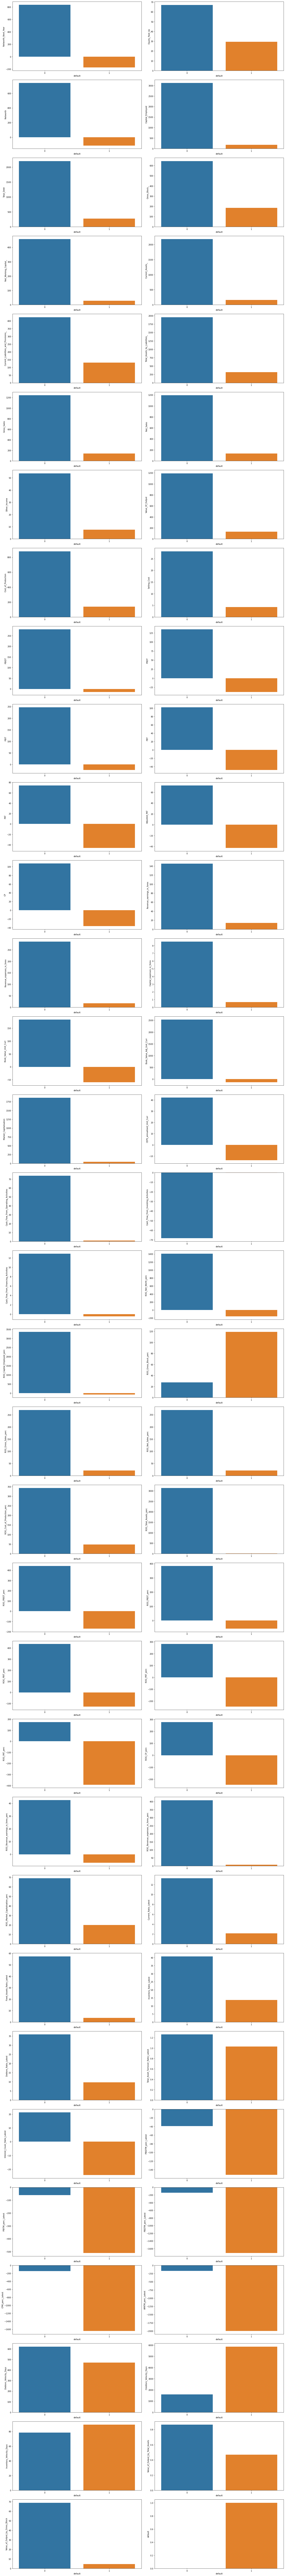

In [39]:
fig, ax = plt.subplots(figsize = (20, 180), nrows = 33, ncols = 2)

for i, col in enumerate(Company.columns):
    sns.barplot(x = Company['default'], y = Company[col], ax = ax[i//2, i%2],ci=None)
    
plt.tight_layout(pad = 1.1)

In [41]:
Company = Company.drop(['Networth_Next_Year'], axis = 1)
Company.head()

Equity_Paid_Up  Networth  Capital_Employed  Total_Debt  Gross_Block_  \
0          419.36  -7027.48          -1007.24     5936.03        474.30   
1         1954.93  -2968.08           4458.20     7410.18       9070.86   
2           53.84    506.86           7714.68     6944.54       1281.54   
3          157.30   -623.49           2353.88     2326.05       1033.69   
4           50.30  -1070.83           4675.33     5740.90       1084.20   

   Net_Working_Capital_  Current_Assets_  Current_Liabilities_and_Provisions_  \
0              -1076.34            40.50                              1116.85   
1              -1098.88           486.86                              1585.74   
2               4496.25          9097.64                              4601.39   
3              -2612.42          1034.12                              3646.54   
4               1836.23          4685.81                              2849.58   

   Total_Assets_by_Liabilities_  Gross_Sales  ...  PBITM_perc_Latest  \
0                        109.60         0.00  ...               0.00   
1                       6043.94      2892.73  ...             -39.74   
2                      12316.07       392.13  ...           -5516.98   
3                       6000.42      1354.39  ...              -7.21   
4                       7524.91        38.72  ...            -400.55   

   PBDTM_perc_Latest  CPM_perc_Latest  APATM_perc_Latest  \
0               0.00             0.00               0.00   
1             -57.74           -57.74             -87.18   
2           -7780.25         -7723.67           -7961.51   
3             -48.13           -47.70             -51.58   
4            -845.88           379.79             274.79   

   Debtors_Velocity_Days  Creditors_Velocity_Days  Inventory_Velocity_Days  \
0                      0                        0                     45.0   
1                     29                      101                      2.0   
2                     97                      558                      0.0   
3                     93                       63                      2.0   
4                   3887                      346                      0.0   

   Value_of_Output_by_Total_Assets  Value_of_Output_by_Gross_Block  default  
0                             0.00                            0.00        1  
1                             0.31                            0.24        1  
2                            -0.03                           -0.26        1  
3                             0.24                            1.90        1  
4                             0.01                            0.05        1  

[5 rows x 65 columns]

In [42]:
print(Company.isnull().sum())

Equity_Paid_Up                       0
Networth                             0
Capital_Employed                     0
Total_Debt                           0
Gross_Block_                         0
                                  ... 
Creditors_Velocity_Days              0
Inventory_Velocity_Days            103
Value_of_Output_by_Total_Assets      0
Value_of_Output_by_Gross_Block       0
default                              0
Length: 65, dtype: int64


In [51]:
print("The missing values in the dataset are",Company.isnull().sum().sum())

The missing values in the dataset are 118


In [45]:
Company_X = Company.drop('default', axis = 1)
Company_Y = Company['default']

In [46]:
Company_X.head()

Equity_Paid_Up  Networth  Capital_Employed  Total_Debt  Gross_Block_  \
0          419.36  -7027.48          -1007.24     5936.03        474.30   
1         1954.93  -2968.08           4458.20     7410.18       9070.86   
2           53.84    506.86           7714.68     6944.54       1281.54   
3          157.30   -623.49           2353.88     2326.05       1033.69   
4           50.30  -1070.83           4675.33     5740.90       1084.20   

   Net_Working_Capital_  Current_Assets_  Current_Liabilities_and_Provisions_  \
0              -1076.34            40.50                              1116.85   
1              -1098.88           486.86                              1585.74   
2               4496.25          9097.64                              4601.39   
3              -2612.42          1034.12                              3646.54   
4               1836.23          4685.81                              2849.58   

   Total_Assets_by_Liabilities_  Gross_Sales  ...  PBIDTM_perc_Latest  \
0                        109.60         0.00  ...                0.00   
1                       6043.94      2892.73  ...              -10.30   
2                      12316.07       392.13  ...            -5279.14   
3                       6000.42      1354.39  ...               -3.33   
4                       7524.91        38.72  ...             -295.55   

   PBITM_perc_Latest  PBDTM_perc_Latest  CPM_perc_Latest  APATM_perc_Latest  \
0               0.00               0.00             0.00               0.00   
1             -39.74             -57.74           -57.74             -87.18   
2           -5516.98           -7780.25         -7723.67           -7961.51   
3              -7.21             -48.13           -47.70             -51.58   
4            -400.55            -845.88           379.79             274.79   

   Debtors_Velocity_Days  Creditors_Velocity_Days  Inventory_Velocity_Days  \
0                      0                        0                     45.0   
1                     29                      101                      2.0   
2                     97                      558                      0.0   
3                     93                       63                      2.0   
4                   3887                      346                      0.0   

   Value_of_Output_by_Total_Assets  Value_of_Output_by_Gross_Block  
0                             0.00                            0.00  
1                             0.31                            0.24  
2                            -0.03                           -0.26  
3                             0.24                            1.90  
4                             0.01                            0.05  

[5 rows x 64 columns]

In [47]:
Q1 = Company_X.quantile(0.25)
Q3 = Company_X.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [48]:
((Company_X > UL) | (Company_X < LL)).sum()

Equity_Paid_Up                     448
Networth                           650
Capital_Employed                   596
Total_Debt                         583
Gross_Block_                       540
                                  ... 
Debtors_Velocity_Days              398
Creditors_Velocity_Days            391
Inventory_Velocity_Days            262
Value_of_Output_by_Total_Assets    150
Value_of_Output_by_Gross_Block     481
Length: 64, dtype: int64

In [49]:
Company_X[((Company_X > UL) | (Company_X < LL))]= np.nan
Company_X.isnull().sum()

Equity_Paid_Up                     448
Networth                           650
Capital_Employed                   596
Total_Debt                         583
Gross_Block_                       540
                                  ... 
Debtors_Velocity_Days              398
Creditors_Velocity_Days            391
Inventory_Velocity_Days            365
Value_of_Output_by_Total_Assets    150
Value_of_Output_by_Gross_Block     481
Length: 64, dtype: int64

Since the outliers are too large in the number.it will affect the model.but Also given the fact that this is a financial data and the outliers might very well reflect the information which is genuine in nature. Since data captured from different size of companies

Although most outliers have nan values which is a missing data which should be treated with missing data imputation method .here KNN imputation method is used

In [50]:
Company_X.isnull().sum().sum()

41473

In [52]:
Company_X.shape

(3586, 64)

In [53]:
Company_sub1 = pd.concat([Company_X, Company_Y], axis =1 )

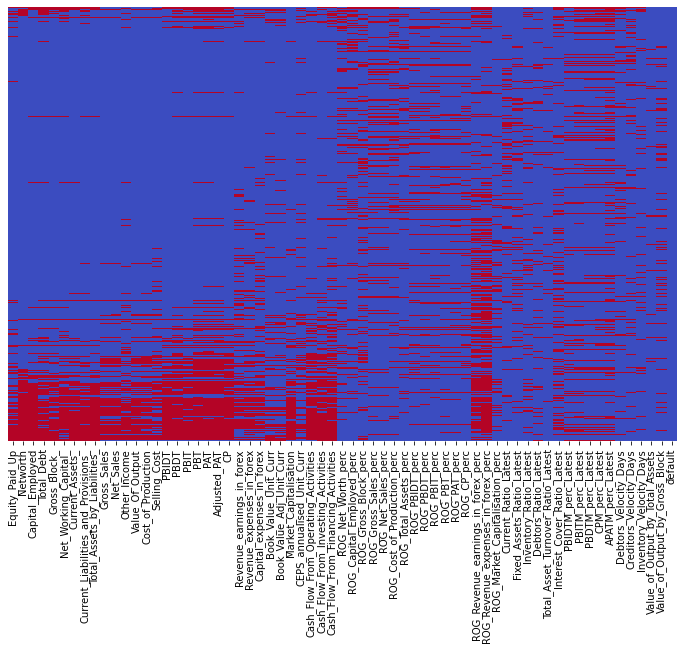

In [54]:
plt.figure(figsize = (12,8))
sns.heatmap(Company_sub1.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

In [55]:
Company_sub1.isnull().sum(axis = 1)

0       19
1       34
2       43
3       36
4       35
        ..
3581    30
3582    36
3583    34
3584    30
3585    36
Length: 3586, dtype: int64

In [56]:
Company_sub1_temp = Company_sub1[Company_sub1.isnull().sum(axis = 1) <= 5]
Company_sub1_temp.shape

(1203, 65)

In [57]:
Company_sub1_temp['default'].value_counts()

0    1085
1     118
Name: default, dtype: int64

If we consider availability of features for deciding the observations to be considered, we will end up losing more than 90% of the actual defaulters.

In [58]:
Company_sub1['default'].value_counts()

0    3198
1     388
Name: default, dtype: int64

In [59]:
Company_sub1.isnull().sum().sort_values(ascending = False)/Company_sub1.index.size

ROG_Revenue_expenses_in_forex_perc     0.450363
ROG_Revenue_earnings_in_forex_perc     0.367262
Cash_Flow_From_Financing_Activities    0.280257
PAT                                    0.267429
Adjusted_PAT                           0.266035
                                         ...   
Debtors_Ratio_Latest                   0.103737
Inventory_Velocity_Days                0.101785
Total_Asset_Turnover_Ratio_Latest      0.056330
Value_of_Output_by_Total_Assets        0.041829
default                                0.000000
Length: 65, dtype: float64

In [61]:
Company_sub2 = Company_sub1.drop(["ROG_Revenue_expenses_in_forex_perc","ROG_Revenue_earnings_in_forex_perc"],
                           axis = 1)
Company_sub2.shape

(3586, 63)

In [62]:
predictors = Company_sub2.drop('default', axis = 1)
response = Company_sub2['default']

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_predictors = pd.DataFrame(scaler.fit_transform(predictors), columns = predictors.columns)

In [64]:
Company_sub3 = pd.concat([scaled_predictors, response], axis = 1)

In [65]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)
Company_imputed = pd.DataFrame(imputer.fit_transform(Company_sub3), columns = Company_sub3.columns)
Company_imputed.isnull().sum()

Equity_Paid_Up                     0
Networth                           0
Capital_Employed                   0
Total_Debt                         0
Gross_Block_                       0
                                  ..
Creditors_Velocity_Days            0
Inventory_Velocity_Days            0
Value_of_Output_by_Total_Assets    0
Value_of_Output_by_Gross_Block     0
default                            0
Length: 63, dtype: int64

Data is scaled and preprocessed before imputating missing data using KNN Imputer.Imputation for completing missing values using k-Nearest Neighbors.

Each sample’s missing values are imputed using the mean value from n_neighbors nearest neighbors found in the training set. Two samples are close if the features that neither is missing are close.

Inspect possible correlations between independent variables

<AxesSubplot:>

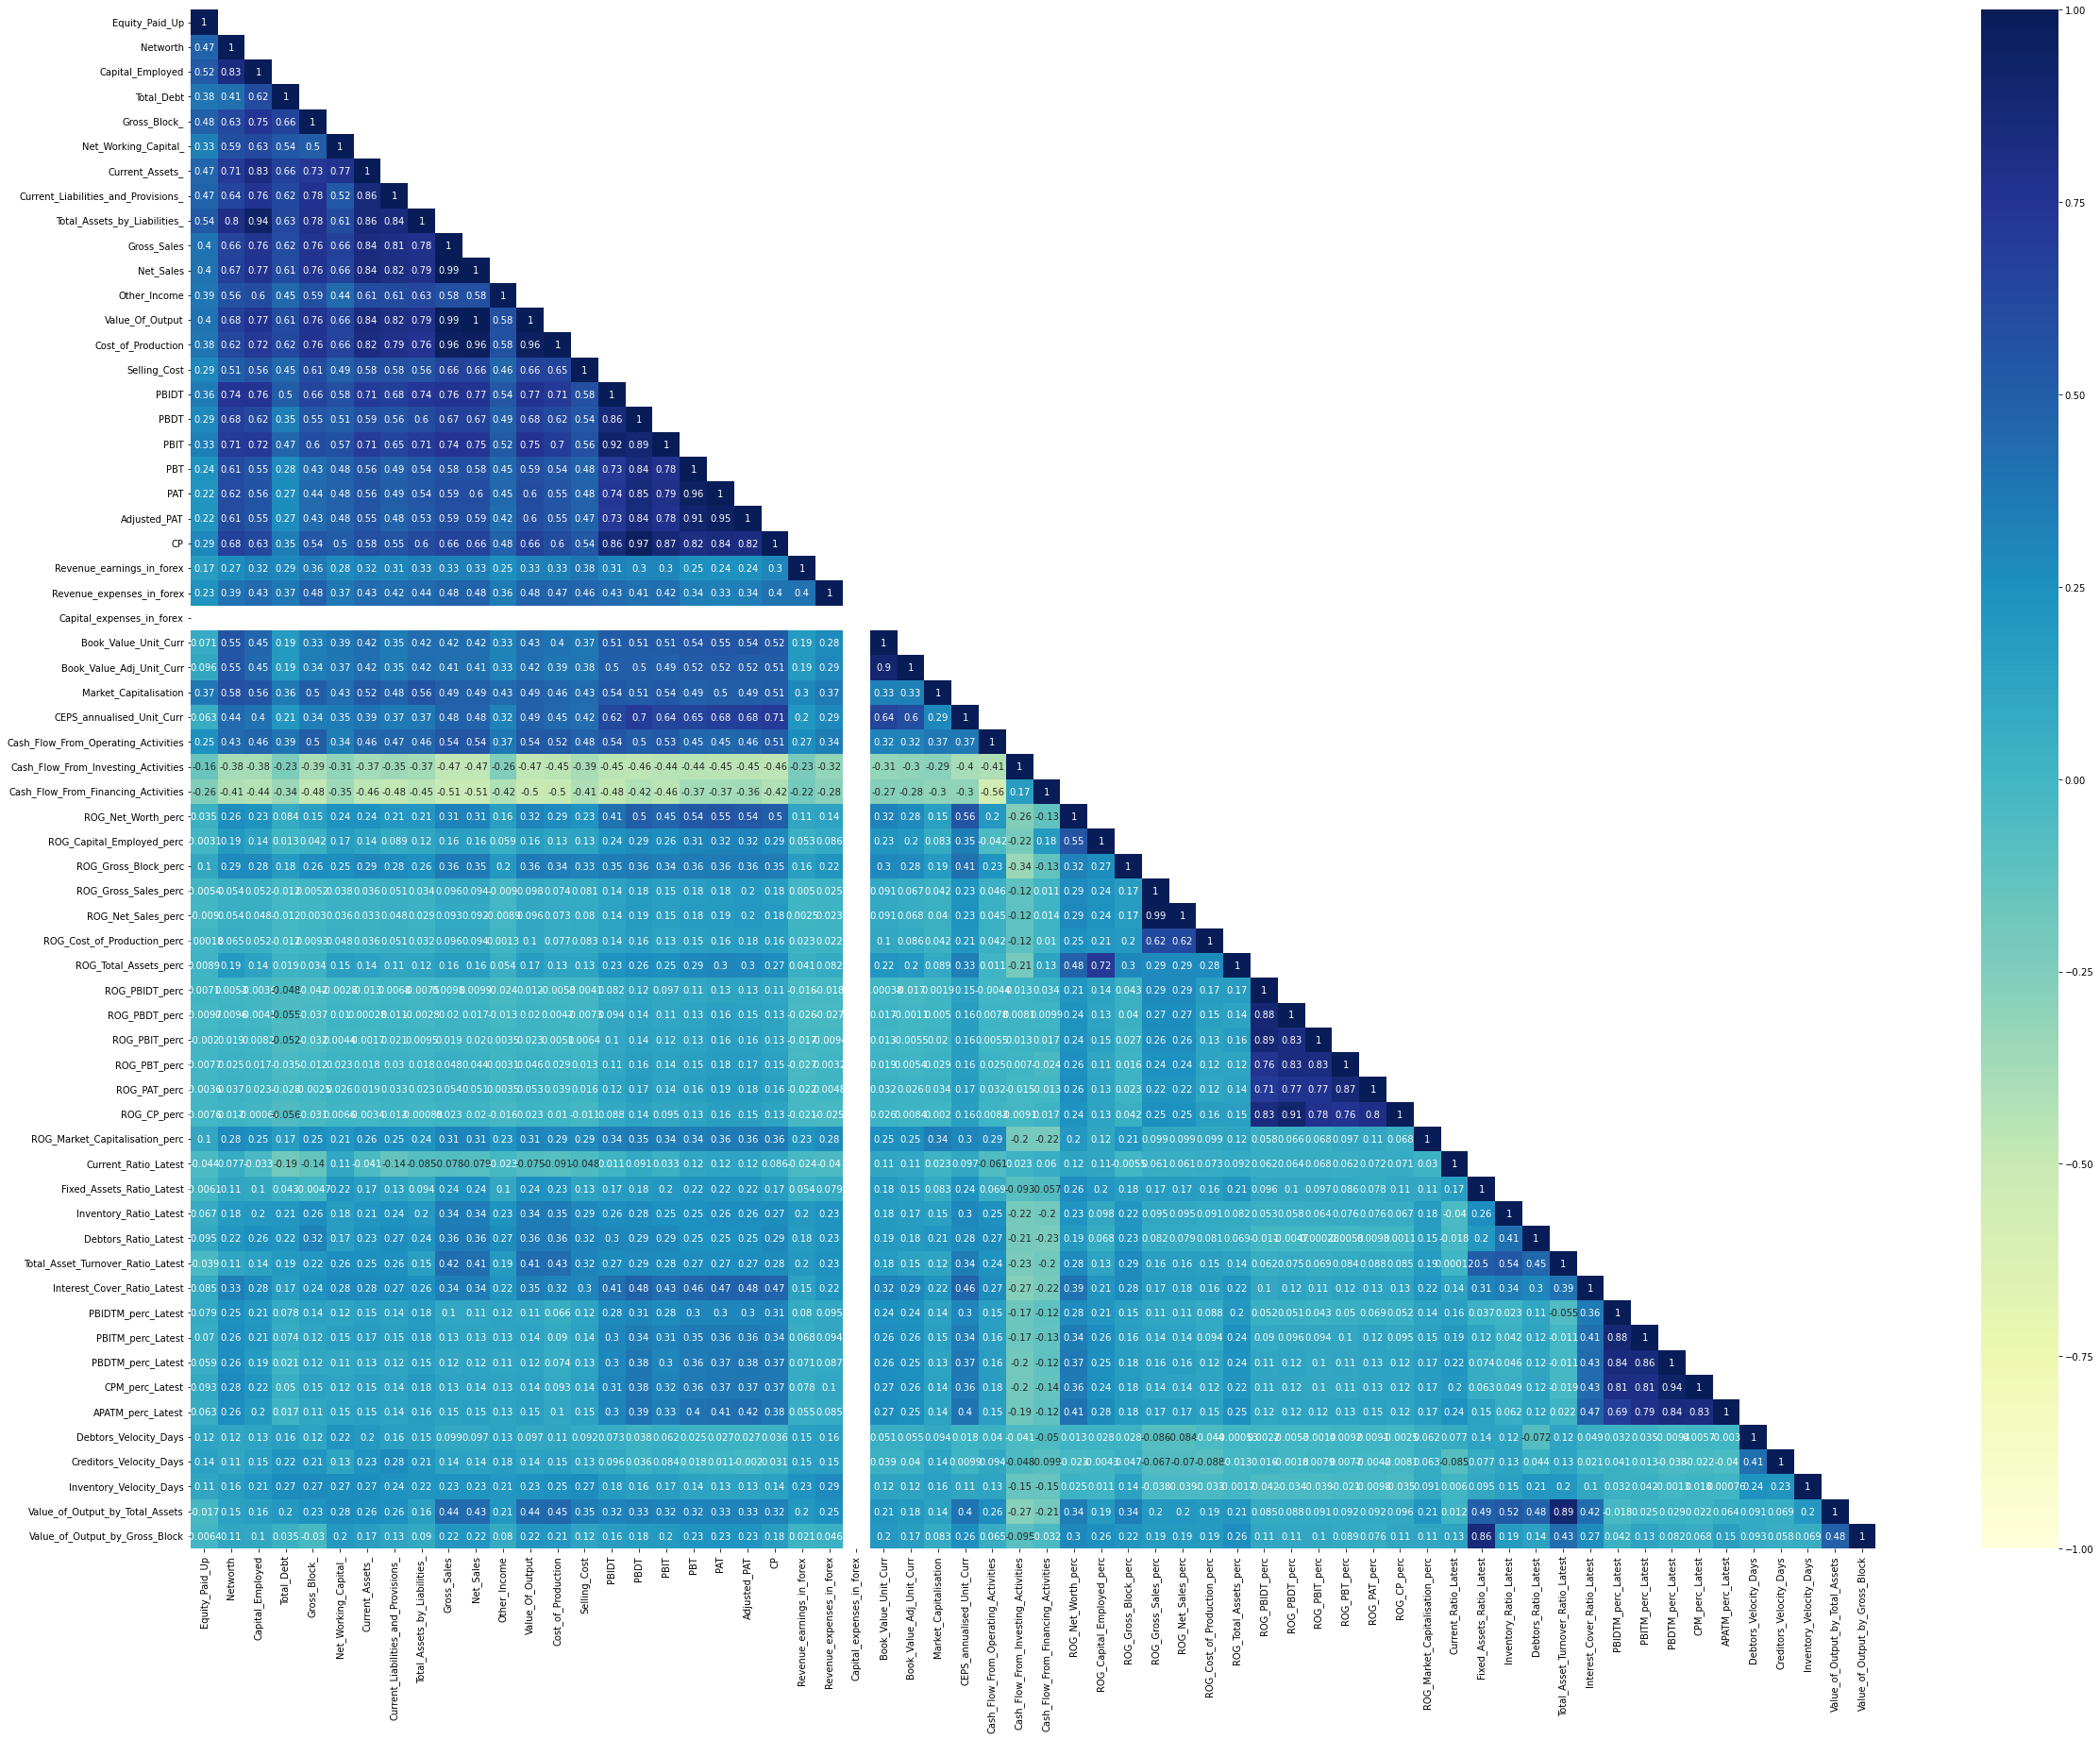

In [66]:
plt.figure(figsize = (40,30))
cor_matrix = Company_imputed.drop('default', axis = 1).corr()
sns.heatmap(cor_matrix, cmap = 'YlGnBu', annot=True,vmin = -1, vmax= 1, mask=np.triu(cor_matrix,+1))

In [67]:
X = Company_imputed.drop('default', axis = 1)
y = Company_imputed['default']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size = 0.33, random_state = 42)

In [69]:
print('The training set for the independent variables:',X_train.shape)
print('The training set for the dependent variable:',y_train.shape)
print('The test set for the independent variables:',X_test.shape)
print('The test set for the dependent variable:',y_test.shape)

The training set for the independent variables: (2402, 62)
The training set for the dependent variable: (2402,)
The test set for the independent variables: (1184, 62)
The test set for the dependent variable: (1184,)


In [70]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [15,20],
    'min_samples_leaf': [10,20],
    'min_samples_split': [ 50,100],
    'n_estimators': [301,401,701]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid)

In [71]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [15, 20], 'min_samples_leaf': [10, 20],
                         'min_samples_split': [50, 100],
                         'n_estimators': [301, 401, 701]})

In [72]:
grid_search.best_params_

{'max_depth': 15,
 'min_samples_leaf': 20,
 'min_samples_split': 100,
 'n_estimators': 401}

In [73]:
best_grid = grid_search.best_estimator_

In [74]:
pred_train_rf = best_grid.predict(X_train)
pred_test_rf = best_grid.predict(X_test)
ytrain_predict_prob_rm= best_grid.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob_rm).head()

0         1
0  0.982523  0.017477
1  0.994532  0.005468
2  0.932613  0.067387
3  0.945453  0.054547
4  1.000000  0.000000

In [75]:
ytest_predict_prob_rm=best_grid.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob_rm).head()

0         1
0  0.992703  0.007297
1  0.977112  0.022888
2  0.880947  0.119053
3  0.196207  0.803793
4  0.936337  0.063663

In [76]:
print(pd.DataFrame(best_grid.feature_importances_, columns=["IMP"],index = X_train.columns).sort_values('IMP',ascending =False))

                                          IMP
Networth                             0.232167
Book_Value_Unit_Curr                 0.216041
Book_Value_Adj_Unit_Curr             0.183907
Current_Ratio_Latest                 0.054498
Capital_Employed                     0.049386
...                                       ...
ROG_PBIDT_perc                       0.000314
ROG_PAT_perc                         0.000305
Debtors_Ratio_Latest                 0.000293
Cash_Flow_From_Financing_Activities  0.000233
Capital_expenses_in_forex            0.000000

[62 rows x 1 columns]


In [77]:
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

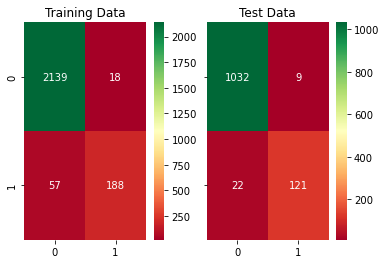

In [78]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train, pred_train_rf)),annot=True,fmt='.5g',cmap='RdYlGn',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test, pred_test_rf)),annot=True,fmt='.5g',cmap='RdYlGn',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [79]:
print(classification_report(y_train, pred_train_rf),'\n');
print(classification_report(y_test, pred_test_rf),'\n');

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      2157
         1.0       0.91      0.77      0.83       245

    accuracy                           0.97      2402
   macro avg       0.94      0.88      0.91      2402
weighted avg       0.97      0.97      0.97      2402
 

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      1041
         1.0       0.93      0.85      0.89       143

    accuracy                           0.97      1184
   macro avg       0.95      0.92      0.94      1184
weighted avg       0.97      0.97      0.97      1184
 



AUC for the Training Data: 0.991
AUC for the Test Data: 0.988


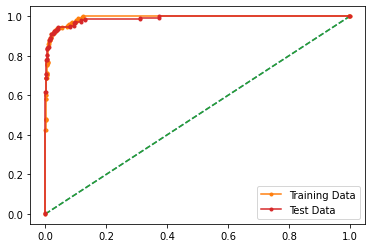

In [80]:
# AUC and ROC for the training data

# calculate AUC
train_auc_rf = metrics.roc_auc_score(y_train,ytrain_predict_prob_rm[:,1])
print('AUC for the Training Data: %.3f' % train_auc_rf)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,ytrain_predict_prob_rm[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
test_auc_rf = metrics.roc_auc_score(y_test,ytest_predict_prob_rm[:,1])
print('AUC for the Test Data: %.3f' %test_auc_rf )

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,ytest_predict_prob_rm[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

# LDA

In [81]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis()
lda_model = LDA.fit(X_train, y_train)
pred_train_lda = lda_model.predict(X_train)
pred_test_lda = lda_model.predict(X_test)
ytrain_predict_prob_lda= lda_model.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob_lda).head()

0         1
0  0.958705  0.041295
1  0.996202  0.003798
2  0.546485  0.453515
3  0.999866  0.000134
4  0.999335  0.000665

In [82]:
ytest_predict_prob_lda= lda_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob_lda).head()

0         1
0  0.983966  0.016034
1  0.950279  0.049721
2  0.859898  0.140102
3  0.919085  0.080915
4  0.996063  0.003937

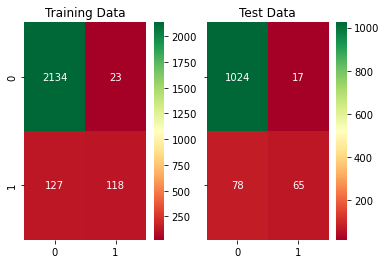

In [83]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train, pred_train_lda)),annot=True,fmt='.5g',cmap='RdYlGn',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test, pred_test_lda)),annot=True,fmt='.5g',cmap='RdYlGn',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [84]:
print(classification_report(y_train, pred_train_lda),'\n');
print(classification_report(y_test, pred_test_lda),'\n');

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97      2157
         1.0       0.84      0.48      0.61       245

    accuracy                           0.94      2402
   macro avg       0.89      0.74      0.79      2402
weighted avg       0.93      0.94      0.93      2402
 

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96      1041
         1.0       0.79      0.45      0.58       143

    accuracy                           0.92      1184
   macro avg       0.86      0.72      0.77      1184
weighted avg       0.91      0.92      0.91      1184
 



AUC for the Training Data: 0.950
AUC for the Test Data: 0.935


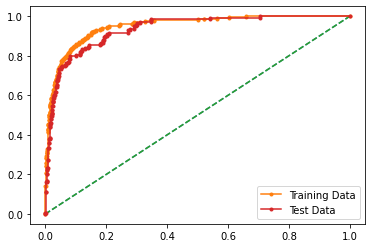

In [85]:
# AUC and ROC for the training data

# calculate AUC
train_auc_lda = metrics.roc_auc_score(y_train,ytrain_predict_prob_lda[:,1])
print('AUC for the Training Data: %.3f' % train_auc_lda)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,ytrain_predict_prob_lda[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
test_auc_lda = metrics.roc_auc_score(y_test,ytest_predict_prob_lda[:,1])
print('AUC for the Test Data: %.3f' %test_auc_lda )

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,ytest_predict_prob_lda[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [86]:
grid_lda={
      'solver':['svd', 'lsqr', 'eigen'],
      
     }
model_lda = LinearDiscriminantAnalysis()
grid_search_lda = GridSearchCV(estimator = model_lda, param_grid = grid_lda, cv = 7,n_jobs=-1,scoring='accuracy')
grid_search_lda.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'solver': ['svd', 'lsqr', 'eigen']},
             scoring='accuracy')

In [87]:
print(grid_search_lda.best_params_,'\n')
print(grid_search_lda.best_estimator_)

{'solver': 'svd'} 

LinearDiscriminantAnalysis()


In [88]:
best_model_lda = grid_search_lda.best_estimator_
ytrain_predictlda = best_model_lda.predict(X_train)
ytest_predictlda = best_model_lda.predict(X_test)
ytrain_predict_problda=best_model_lda.predict_proba(X_train)
pd.DataFrame(ytrain_predict_problda).head()

0         1
0  0.958705  0.041295
1  0.996202  0.003798
2  0.546485  0.453515
3  0.999866  0.000134
4  0.999335  0.000665

In [89]:
ytest_predict_problda=best_model_lda.predict_proba(X_test)
pd.DataFrame(ytest_predict_problda).head()

0         1
0  0.983966  0.016034
1  0.950279  0.049721
2  0.859898  0.140102
3  0.919085  0.080915
4  0.996063  0.003937

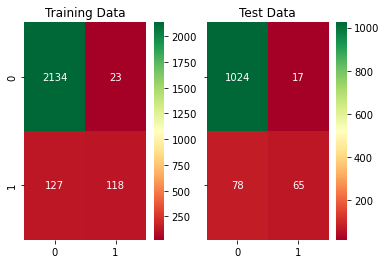

In [90]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predictlda)),annot=True,fmt='.5g',cmap='RdYlGn',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predictlda)),annot=True,fmt='.5g',cmap='RdYlGn',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [91]:
print(classification_report(y_train,ytrain_predictlda),'\n');
print(classification_report(y_test,ytest_predictlda),'\n');

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97      2157
         1.0       0.84      0.48      0.61       245

    accuracy                           0.94      2402
   macro avg       0.89      0.74      0.79      2402
weighted avg       0.93      0.94      0.93      2402
 

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96      1041
         1.0       0.79      0.45      0.58       143

    accuracy                           0.92      1184
   macro avg       0.86      0.72      0.77      1184
weighted avg       0.91      0.92      0.91      1184
 



AUC for the Training Data: 0.950
AUC for the Test Data: 0.935


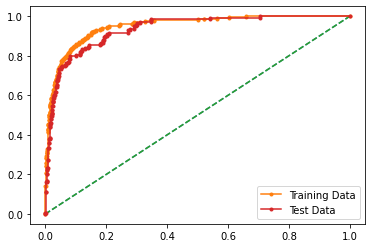

In [92]:
# AUC and ROC for the training data

# calculate AUC
train_auc_lda1 = metrics.roc_auc_score(y_train,ytrain_predict_problda[:,1])
print('AUC for the Training Data: %.3f' % train_auc_lda1)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,ytrain_predict_problda[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
test_auc_lda1 = metrics.roc_auc_score(y_test,ytest_predict_problda[:,1])
print('AUC for the Test Data: %.3f' %test_auc_lda1 )

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,ytest_predict_problda[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [94]:
from sklearn.feature_selection import RFE
LogR = LogisticRegression()
selector = RFE(estimator = LogR, n_features_to_select=15, step=1)
selector = selector.fit(X_train, y_train)
selector.n_features_

15

In [95]:
selector.ranking_

array([38,  1,  1,  4,  1, 11, 10,  1,  1, 20, 40, 17,  1,  1, 24,  1,  2,
        1, 13, 15, 16,  3, 46, 21, 48,  1,  1, 18, 47, 45, 14, 32,  1,  1,
       39, 34, 35,  9, 23, 43, 42, 30, 41, 29, 44, 36,  1, 12, 28, 33,  7,
        1, 27,  5, 25, 26,  6, 31, 19, 22,  8, 37])

In [96]:
df = pd.DataFrame({'Feature': scaled_predictors.columns, 'Rank': selector.ranking_})
df[df['Rank'] == 1]

Feature  Rank
1                              Networth     1
2                      Capital_Employed     1
4                          Gross_Block_     1
7   Current_Liabilities_and_Provisions_     1
8          Total_Assets_by_Liabilities_     1
12                      Value_Of_Output     1
13                   Cost_of_Production     1
15                                PBIDT     1
17                                 PBIT     1
25                 Book_Value_Unit_Curr     1
26             Book_Value_Adj_Unit_Curr     1
32                   ROG_Net_Worth_perc     1
33            ROG_Capital_Employed_perc     1
46                 Current_Ratio_Latest     1
51          Interest_Cover_Ratio_Latest     1

In [97]:
pred_train = selector.predict(X_train)
pred_test = selector.predict(X_test)

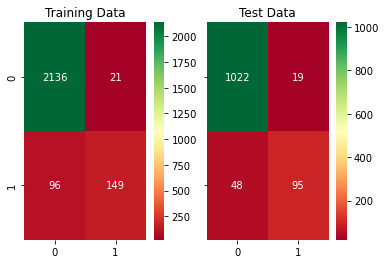

In [98]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train, pred_train)),annot=True,fmt='.5g',cmap='RdYlGn',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test, pred_test)),annot=True,fmt='.5g',cmap='RdYlGn',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [99]:
print(classification_report(y_train, pred_train),'\n');
print(classification_report(y_test, pred_test),'\n');

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      2157
         1.0       0.88      0.61      0.72       245

    accuracy                           0.95      2402
   macro avg       0.92      0.80      0.85      2402
weighted avg       0.95      0.95      0.95      2402
 

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1041
         1.0       0.83      0.66      0.74       143

    accuracy                           0.94      1184
   macro avg       0.89      0.82      0.85      1184
weighted avg       0.94      0.94      0.94      1184
 



In [100]:
ytrain_predict_prob_lr= selector.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob_lr).head()

0             1
0  0.900472  9.952823e-02
1  0.998833  1.167345e-03
2  0.920430  7.956953e-02
3  1.000000  1.728218e-07
4  0.996261  3.738520e-03

In [101]:
ytest_predict_prob_lr= selector.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob_lr).head()

0         1
0  0.995856  0.004144
1  0.998742  0.001258
2  0.812331  0.187669
3  0.070992  0.929008
4  0.995108  0.004892

AUC for the Training Data: 0.958
AUC for the Test Data: 0.967


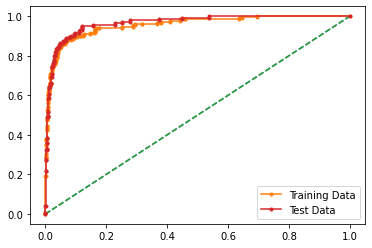

In [102]:
# AUC and ROC for the training data

# calculate AUC
train_auc_lr = metrics.roc_auc_score(y_train,ytrain_predict_prob_lr[:,1])
print('AUC for the Training Data: %.3f' % train_auc_lr)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,ytrain_predict_prob_lr[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
test_auc_lr = metrics.roc_auc_score(y_test,ytest_predict_prob_lr[:,1])
print('AUC for the Test Data: %.3f' %test_auc_lr )

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,ytest_predict_prob_lr[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [103]:
grid1={'penalty':['l2'],
      'solver':['saga'],
      'max_iter':[1000,100],
      'tol':[0.00001,0.001]
     }
modellr = LogisticRegression()
grid_searchlr = GridSearchCV(estimator = modellr, param_grid = grid1, cv = 7,n_jobs=-1,scoring='accuracy')
grid_searchlr.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'max_iter': [1000, 100], 'penalty': ['l2'],
                         'solver': ['saga'], 'tol': [1e-05, 0.001]},
             scoring='accuracy')

In [104]:
print(grid_searchlr.best_params_,'\n')
print(grid_searchlr.best_estimator_)

{'max_iter': 1000, 'penalty': 'l2', 'solver': 'saga', 'tol': 1e-05} 

LogisticRegression(max_iter=1000, solver='saga', tol=1e-05)


In [105]:
best_modellr = grid_searchlr.best_estimator_
ytrain_predictlr = best_modellr.predict(X_train)
ytest_predictlr = best_modellr.predict(X_test)
ytrain_predict_problr=best_modellr.predict_proba(X_train)
pd.DataFrame(ytrain_predict_problr).head()

0             1
0  0.904596  9.540358e-02
1  0.999232  7.678788e-04
2  0.894837  1.051631e-01
3  1.000000  1.316774e-07
4  0.998790  1.209956e-03

In [106]:
ytest_predict_problr=best_modellr.predict_proba(X_test)
pd.DataFrame(ytest_predict_problr).head()

0         1
0  0.997809  0.002191
1  0.998607  0.001393
2  0.821435  0.178565
3  0.259815  0.740185
4  0.998084  0.001916

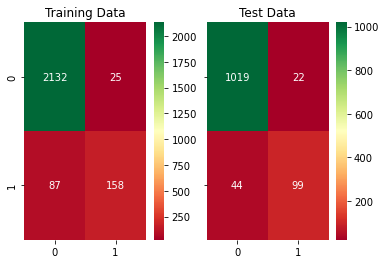

In [107]:

f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predictlr)),annot=True,fmt='.5g',cmap='RdYlGn',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test, ytest_predictlr)),annot=True,fmt='.5g',cmap='RdYlGn',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [108]:
print(classification_report(y_train,ytrain_predictlr),'\n');
print(classification_report(y_test,ytest_predictlr),'\n');

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      2157
         1.0       0.86      0.64      0.74       245

    accuracy                           0.95      2402
   macro avg       0.91      0.82      0.86      2402
weighted avg       0.95      0.95      0.95      2402
 

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1041
         1.0       0.82      0.69      0.75       143

    accuracy                           0.94      1184
   macro avg       0.89      0.84      0.86      1184
weighted avg       0.94      0.94      0.94      1184
 



AUC for the Training Data: 0.965
AUC for the Test Data: 0.966


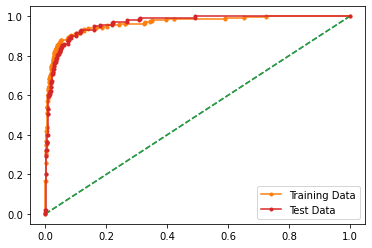

In [109]:
# AUC and ROC for the training data

# calculate AUC
train_auc_lr1 = metrics.roc_auc_score(y_train,ytrain_predict_problr[:,1])
print('AUC for the Training Data: %.3f' % train_auc_lr1)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,ytrain_predict_problr[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
test_auc_lr1 = metrics.roc_auc_score(y_test,ytest_predict_problr[:,1])
print('AUC for the Test Data: %.3f' %test_auc_lr1)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,ytest_predict_problr[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [110]:
import statsmodels.formula.api as SM
df[df['Rank'] == 1]

Feature  Rank
1                              Networth     1
2                      Capital_Employed     1
4                          Gross_Block_     1
7   Current_Liabilities_and_Provisions_     1
8          Total_Assets_by_Liabilities_     1
12                      Value_Of_Output     1
13                   Cost_of_Production     1
15                                PBIDT     1
17                                 PBIT     1
25                 Book_Value_Unit_Curr     1
26             Book_Value_Adj_Unit_Curr     1
32                   ROG_Net_Worth_perc     1
33            ROG_Capital_Employed_perc     1
46                 Current_Ratio_Latest     1
51          Interest_Cover_Ratio_Latest     1

In [111]:
Default_train1= pd.concat([X_train, y_train], axis=1)
Default_test1= pd.concat([X_test, y_test], axis=1)

In [116]:
model_1=SM.logit(formula = 'default ~ Networth + Capital_Employed + Gross_Block_ + Current_Liabilities_and_Provisions_ + Total_Assets_by_Liabilities_ + Value_Of_Output + Cost_of_Production + PBIDT + PBIT + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + Current_Ratio_Latest + Interest_Cover_Ratio_Latest', data=Default_train1).fit()

Optimization terminated successfully.
         Current function value: 0.136292
         Iterations 10


In [117]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2386
Method:                           MLE   Df Model:                           15
Date:                Tue, 10 Jan 2023   Pseudo R-squ.:                  0.5863
Time:                        12:57:44   Log-Likelihood:                -327.37
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                3.686e-188
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -5.2239      0.292    -17.872      0.000      -5.797      -4.651
Networth                               -1.5555      0.334     -4.664      0.000      -2.209      -0.902
Capital_Employed                       -0.7493      0.309     -2.424      0.015      -1.355      -0.143
Gross_Block_                            0.8500      0.228      3.733      0.000       0.404       1.296
Current_Liabilities_and_Provisions_     0.7379      0.236      3.125      0.002       0.275       1.201
Total_Assets_by_Liabilities_            0.7680      0.306      2.509      0.012       0.168       1.368
Value_Of_Output                        -1.8154      0.552     -3.290      0.001      -2.897      -0.734
Cost_of_Production                      1.6849      0.489      3.447      0.001       0.727       2.643
PBIDT                                  -1.2197      0.257     -4.745      0.000      -1.724      -0.716
PBIT                                    0.9219      0.251      3.670      0.000       0.430       1.414
Book_Value_Unit_Curr                   -2.0100      0.544     -3.693      0.000      -3.077      -0.943
Book_Value_Adj_Unit_Curr               -1.5899      0.539     -2.950      0.003      -2.646      -0.533
ROG_Net_Worth_perc                     -0.5607      0.149     -3.768      0.000      -0.852      -0.269
ROG_Capital_Employed_perc               0.4830      0.132      3.672      0.000       0.225       0.741
Current_Ratio_Latest                   -1.0811      0.163     -6.639      0.000      -1.400      -0.762
Interest_Cover_Ratio_Latest            -0.7117      0.167     -4.265      0.000      -1.039      -0.385
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.25 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [118]:
y_prob_pred_train = model_1.predict(Default_train1)
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

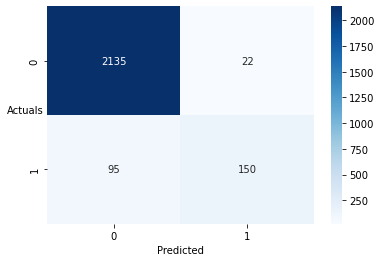

In [119]:
sns.heatmap((metrics.confusion_matrix(Default_train1['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [120]:
print(metrics.classification_report(Default_train1['default'], y_class_pred, digits=2))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      2157
         1.0       0.87      0.61      0.72       245

    accuracy                           0.95      2402
   macro avg       0.91      0.80      0.85      2402
weighted avg       0.95      0.95      0.95      2402



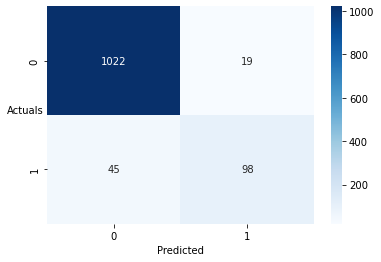

In [121]:
y_prob_pred_test = model_1.predict(Default_test1)
y_class_pred_test=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred_test.append(a)
sns.heatmap((metrics.confusion_matrix(Default_test1['default'],y_class_pred_test)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [122]:
print(metrics.classification_report(Default_test1['default'], y_class_pred_test, digits=2))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1041
         1.0       0.84      0.69      0.75       143

    accuracy                           0.95      1184
   macro avg       0.90      0.83      0.86      1184
weighted avg       0.94      0.95      0.94      1184



# MARKET RISK
## The dataset contains 6 years of information(weekly stock information) on the stock prices of 10 different Indian Stocks. Calculate the mean and standard deviation on the stock returns and share insights.

In [124]:
# Importing the dataset
stock_prices = pd.read_csv('Market+Risk+Dataset.csv')

#Glimpse of Data
stock_prices.head()

Date  Infosys  Indian Hotel  Mahindra & Mahindra  Axis Bank  SAIL  \
0  31-03-2014      264            69                  455        263    68   
1  07-04-2014      257            68                  458        276    70   
2  14-04-2014      254            68                  454        270    68   
3  21-04-2014      253            68                  488        283    68   
4  28-04-2014      256            65                  482        282    63   

   Shree Cement  Sun Pharma  Jindal Steel  Idea Vodafone  Jet Airways  
0          5543         555           298             83          278  
1          5728         610           279             84          303  
2          5649         607           279             83          280  
3          5692         604           274             83          282  
4          5582         611           238             79          243

In [125]:
# Fixing messy column names (containing spaces) for ease of use
stock_prices.columns = stock_prices.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('.', '')
stock_prices.head()

Date  Infosys  Indian_Hotel  Mahindra_&_Mahindra  Axis_Bank  SAIL  \
0  31-03-2014      264            69                  455        263    68   
1  07-04-2014      257            68                  458        276    70   
2  14-04-2014      254            68                  454        270    68   
3  21-04-2014      253            68                  488        283    68   
4  28-04-2014      256            65                  482        282    63   

   Shree_Cement  Sun_Pharma  Jindal_Steel  Idea_Vodafone  Jet_Airways  
0          5543         555           298             83          278  
1          5728         610           279             84          303  
2          5649         607           279             83          280  
3          5692         604           274             83          282  
4          5582         611           238             79          243

In [126]:
print('The number of rows',stock_prices.shape[0],'\n''The number of columns',stock_prices.shape[1])

The number of rows 314 
The number of columns 11


In [127]:
# Checking data types of all columns
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 314 non-null    object
 1   Infosys              314 non-null    int64 
 2   Indian_Hotel         314 non-null    int64 
 3   Mahindra_&_Mahindra  314 non-null    int64 
 4   Axis_Bank            314 non-null    int64 
 5   SAIL                 314 non-null    int64 
 6   Shree_Cement         314 non-null    int64 
 7   Sun_Pharma           314 non-null    int64 
 8   Jindal_Steel         314 non-null    int64 
 9   Idea_Vodafone        314 non-null    int64 
 10  Jet_Airways          314 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 27.1+ KB


In [128]:
# Now, let us check the basic measures of descriptive statistics for the continuous variables
stock_prices.describe()

Infosys  Indian_Hotel  Mahindra_&_Mahindra   Axis_Bank        SAIL  \
count  314.000000    314.000000           314.000000  314.000000  314.000000   
mean   511.340764    114.560510           636.678344  540.742038   59.095541   
std    135.952051     22.509732           102.879975  115.835569   15.810493   
min    234.000000     64.000000           284.000000  263.000000   21.000000   
25%    424.000000     96.000000           572.000000  470.500000   47.000000   
50%    466.500000    115.000000           625.000000  528.000000   57.000000   
75%    630.750000    134.000000           678.000000  605.250000   71.750000   
max    810.000000    157.000000           956.000000  808.000000  104.000000   

       Shree_Cement   Sun_Pharma  Jindal_Steel  Idea_Vodafone  Jet_Airways  
count    314.000000   314.000000    314.000000     314.000000   314.000000  
mean   14806.410828   633.468153    147.627389      53.713376   372.659236  
std     4288.275085   171.855893     65.879195      31.248985   202.262668  
min     5543.000000   338.000000     53.000000       3.000000    14.000000  
25%    10952.250000   478.500000     88.250000      25.250000   243.250000  
50%    16018.500000   614.000000    142.500000      53.000000   376.000000  
75%    17773.250000   785.000000    182.750000      82.000000   534.000000  
max    24806.000000  1089.000000    338.000000     117.000000   871.000000

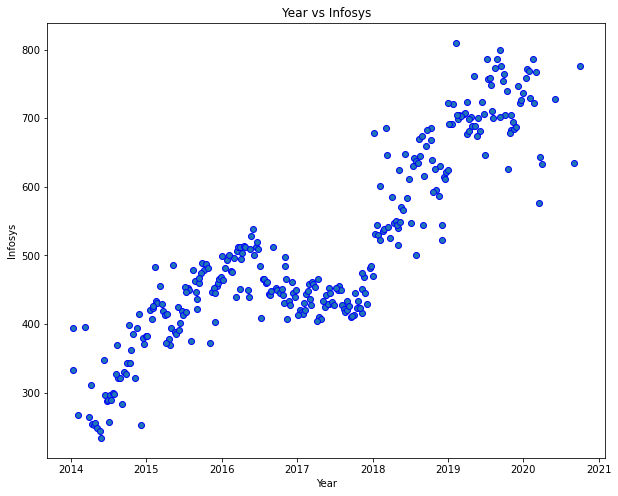

In [129]:
# Lets us plot & see price trend over time for different companies
plt.figure(figsize = (10, 8))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Infosys'], edgecolors='b')
plt.xlabel('Year')
plt.ylabel('Infosys')
plt.title('Year vs Infosys')

plt.show()

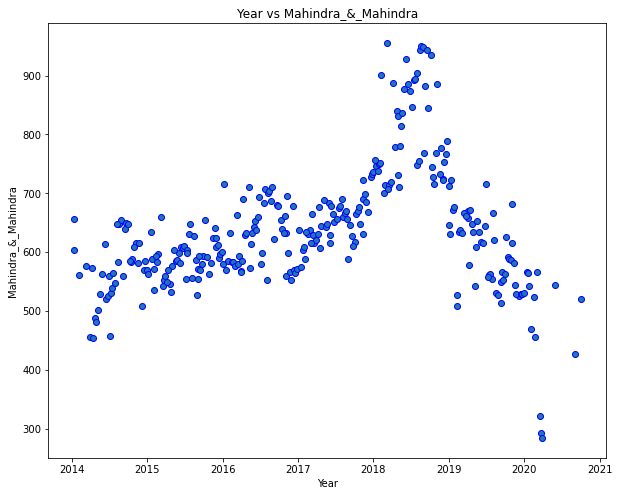

In [130]:
plt.figure(figsize = (10, 8))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Mahindra_&_Mahindra'], edgecolors='b')
plt.xlabel('Year')
plt.ylabel('Mahindra_&_Mahindra')
plt.title('Year vs Mahindra_&_Mahindra')
plt.show()

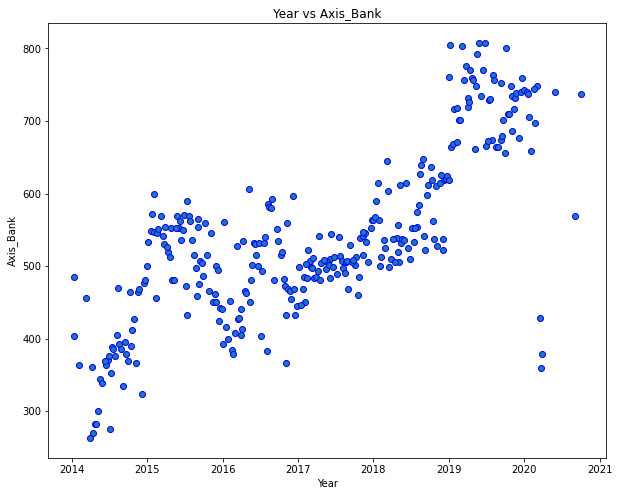

In [131]:
plt.figure(figsize = (10, 8))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Axis_Bank'], edgecolors='b')
plt.xlabel('Year')
plt.ylabel('Axis_Bank')
plt.title('Year vs Axis_Bank')

plt.show()

In [132]:
# Analyzing returns
# Steps for calculating returns from prices:
# Take logarithms
# Take differences
stock_returns = np.log(stock_prices.drop(['Date','dates'],axis=1)).diff(axis = 0, periods = 1) 
# Checking the rows & columns of dataset
stock_returns.shape

(314, 10)

In [133]:
stock_returns.head()

Infosys  Indian_Hotel  Mahindra_&_Mahindra  Axis_Bank      SAIL  \
0       NaN           NaN                  NaN        NaN       NaN   
1 -0.026873     -0.014599             0.006572   0.048247  0.028988   
2 -0.011742      0.000000            -0.008772  -0.021979 -0.028988   
3 -0.003945      0.000000             0.072218   0.047025  0.000000   
4  0.011788     -0.045120            -0.012371  -0.003540 -0.076373   

   Shree_Cement  Sun_Pharma  Jindal_Steel  Idea_Vodafone  Jet_Airways  
0           NaN         NaN           NaN            NaN          NaN  
1      0.032831    0.094491     -0.065882       0.011976     0.086112  
2     -0.013888   -0.004930      0.000000      -0.011976    -0.078943  
3      0.007583   -0.004955     -0.018084       0.000000     0.007117  
4     -0.019515    0.011523     -0.140857      -0.049393    -0.148846

In [134]:
stock_returns

Infosys  Indian_Hotel  Mahindra_&_Mahindra  Axis_Bank      SAIL  \
0         NaN           NaN                  NaN        NaN       NaN   
1   -0.026873     -0.014599             0.006572   0.048247  0.028988   
2   -0.011742      0.000000            -0.008772  -0.021979 -0.028988   
3   -0.003945      0.000000             0.072218   0.047025  0.000000   
4    0.011788     -0.045120            -0.012371  -0.003540 -0.076373   
..        ...           ...                  ...        ...       ...   
309  0.009649     -0.110348             0.030305  -0.057580 -0.087011   
310 -0.139625     -0.051293            -0.093819  -0.145324 -0.095310   
311 -0.094207     -0.236389            -0.285343  -0.284757 -0.105361   
312  0.109856     -0.182322            -0.091269  -0.173019 -0.251314   
313 -0.017228      0.000000            -0.031198   0.051432  0.090972   

     Shree_Cement  Sun_Pharma  Jindal_Steel  Idea_Vodafone  Jet_Airways  
0             NaN         NaN           NaN            NaN          NaN  
1        0.032831    0.094491     -0.065882       0.011976     0.086112  
2       -0.013888   -0.004930      0.000000      -0.011976    -0.078943  
3        0.007583   -0.004955     -0.018084       0.000000     0.007117  
4       -0.019515    0.011523     -0.140857      -0.049393    -0.148846  
..            ...         ...           ...            ...          ...  
309      0.023688    0.072383     -0.053346      -0.287682    -0.127833  
310     -0.081183   -0.043319     -0.187816       0.693147    -0.200671  
311     -0.119709   -0.050745     -0.141830      -0.693147    -0.117783  
312     -0.067732   -0.076851     -0.165324       0.000000    -0.133531  
313     -0.006816    0.040585     -0.081917       0.000000     0.000000  

[314 rows x 10 columns]

In [135]:
# We now look at Means & Standard Deviations of these returns
# Stock Means: Average returns that the stock is making on a week to week basis
# Stock Standard Deviation : It is a measure of volatility meaning the more a stock's returns vary from the stock's average return, the more volatile the stock
# Calculating stock means
stock_means = stock_returns.mean(axis = 0)
stock_means.sort_values(ascending=False)

Shree_Cement           0.003681
Infosys                0.002794
Axis_Bank              0.001167
Indian_Hotel           0.000266
Sun_Pharma            -0.001455
Mahindra_&_Mahindra   -0.001506
SAIL                  -0.003463
Jindal_Steel          -0.004123
Jet_Airways           -0.009548
Idea_Vodafone         -0.010608
dtype: float64

In [136]:
# Calculating stock standard deviation
stock_sd = stock_returns.std(axis = 0)
stock_sd.sort_values(ascending=False)

Idea_Vodafone          0.104315
Jet_Airways            0.097972
Jindal_Steel           0.075108
SAIL                   0.062188
Indian_Hotel           0.047131
Axis_Bank              0.045828
Sun_Pharma             0.045033
Mahindra_&_Mahindra    0.040169
Shree_Cement           0.039917
Infosys                0.035070
dtype: float64

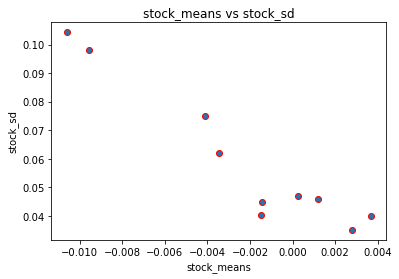

In [137]:

# Let us plot & see what they say about stock prices
plt.scatter(stock_means, stock_sd, edgecolors='r')
plt.xlabel('stock_means')
plt.ylabel('stock_sd')
plt.title('stock_means vs stock_sd')
plt.show()